---
<div>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo-udla.jpg' with='50' height='15'align=center> 
</div>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---

<h2><font color='darkcyan'>Examen Machine Learning I</font></h2>
<h3><font color='IndianRed'>Problema 1: Clasificando departamentos</font></h3>

<p1><b><h3>Nombre: Didimo Escobar</h3></b></p1>

<p1><b>GitHub: https://github.com/descobardos/MG-Data-Science/tree/main/Machine%20Learning%20I</b></p1>

<p2><b>Email: descobardos@gmail.com</b></p2>
<br></br>

> El objetivo y espiritu de este proceso es evaluar los contenidos aprendidos durante este bimestre en Machine Learning I, que aborda el aprendizaje no supervisado.
>


#### Problema 1: Clasificando departamentos

<p style='text-align: justify;'>Suponga que usted trabaja en una entidad gubernamental de planificación urbana de una ciudad como científico de datos, y es parte de un proyecto de clasificación de inmuebles, y para ello, le solicitan estudiar datos de EEUU para luego aplicar esa metodología en Chile, ya que aún están en la etapa de recolección de datos, que como usted ya sabe, a veces puede ser lo más dificil de obtener en un proyecto centrado en datos.</p>

Este dataset se encuentra en https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

<p style='text-align: justify;'>El objetivo de este problema es implementar un análisis completo de segmentación de departamentos. Para ello, siga estas indicaciones y responda si corresponde:</p>

- Descargar el archivo adjunto. Puede escoger el dataset de 10.000 filas o de 100.000 filas
- Realice una limpieza de datos adecuada.
- Descarte las variables cualitativas, es decir, filtre las columnas de manera tal de sólo operar con variables cuantitativas.
- Realice un análisis descriptivo de datos. Concluya.
- Realice la reducción de dimensiones, si es pertinente.
- Aplique más de un método de clusterización.
- Interpretar los clusters obtenidos.
- Evaluar los métodos de clusterización y comparar. Concluya.
- ¿De qué manera sus conclusiones podrían cambiar cuando aplique este análisis al caso chileno?
- ¿Cömo la información cualitativa que descartó le podría servir para mejorar la clusterización? Si es posible, implemente un método que permita operar con variables cualitativas y re-interprete los resultados.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

# settings para pandas
pd.set_option('display.max_columns', 500)

# settings para 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# se selecciona archivo de 10.000 registros desde repositorio GITHUB
url = 'https://raw.githubusercontent.com/descobardos/MG-Data-Science/main/Machine%20Learning%20I/Data/apartments_for_rent_classified_10K.csv'

deptos = pd.read_csv(url, encoding='latin-1', sep=';')

> <font color='darkcyan'><b><h2>Reflexión general </h2></b></font>
>


In [3]:
#primeros cinco registros
deptos.head(n=5)

id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Washington Blvd, N Cle...       NaN        NaN   

   bedrooms currency fee  has_photo pets_allowed  price price_display  \
0       0.0      USD  No  Thumbnail         None    790          $790   
1       1.0      USD  No  Thumbnail         None    425          $425   
2       0.0      USD  No  Thumbnail         None   1390        $1,390   
3       0.0      USD  No  Thumbnail         None    925          $925   
4       0.0      USD  No  Thumbnail         None    880          $880   

  price_type  square_feet           address    cityname state  latitude  \
0    Monthly          101               NaN  Washington    DC   38.9057   
1    Monthly          106    814 Schutte Rd  Evansville    IN   37.9680   
2    Monthly          107               NaN   Arlington    VA   38.8910   
3    Monthly          116  1717 12th Avenue     Seattle    WA   47.6160   
4    Monthly          125               NaN   Arlington    VA   38.8738   

   longitude     source        time  
0   -76.9861  RentLingo  1577359415  
1   -87.6621  RentLingo  1577017063  
2   -77.0816  RentLingo  1577359410  
3  -122.3275  RentLingo  1576667743  
4   -77.1055  RentLingo  1577359401

In [4]:
#ultimos cinco registros
deptos.tail(n=5)

id                category  \
9995  5630240092  housing/rent/apartment   
9996  5668640983  housing/rent/apartment   
9997  5668643292  housing/rent/apartment   
9998  5668662559  housing/rent/apartment   
9999  5509132540  housing/rent/apartment   

                                           title  \
9995          Five BR 5407 Abbott Place - Abbott   
9996                     Six BR 256 Las Entradas   
9997                 Six BR 9908 Bentcross Drive   
9998                 One BR in New York NY 10069   
9999  Beautiful Lawrenceville Apartment for rent   

                                                   body  \
9995  This unit is located at 5407 Abbott Place - Ab...   
9996  This unit is located at 256 Las Entradas, Mont...   
9997  This unit is located at 9908 Bentcross Drive, ...   
9998  Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...   
9999  Square footage: 880 sq. feet, unit number: 150...   

                                              amenities  bathrooms  bedrooms  \
9995                                                NaN        4.0       5.0   
9996                                                NaN        8.0       6.0   
9997                                                NaN        8.5       6.0   
9998  Basketball,Cable or Satellite,Doorman,Hot Tub,...        NaN       1.0   
9999                                     Gym,Patio/Deck        1.0       1.0   

     currency fee  has_photo pets_allowed  price price_display price_type  \
9995      USD  No  Thumbnail         None   6000        $6,000    Monthly   
9996      USD  No  Thumbnail         None  25000       $25,000    Monthly   
9997      USD  No  Thumbnail         None  11000       $11,000    Monthly   
9998      USD  No  Thumbnail          NaN   4790        $4,790    Monthly   
9999      USD  No         No          NaN   1009        $1,009    Monthly   

      square_feet                    address       cityname state  latitude  \
9995         6300  5407 Abbott Place  Abbott          Edina    MN   44.9000   
9996         8716           256 Las Entradas      Montecito    CA   34.4331   
9997        11318          9908 Bentcross Dr        Potomac    MD   39.0287   
9998        40000                        NaN       New York    NY   40.7716   
9999          880                        NaN  Lawrenceville    GA   34.0072   

      longitude        source        time  
9995   -93.3233     RentLingo  1575112975  
9996  -119.6331     RentLingo  1577360419  
9997   -77.2409     RentLingo  1577360560  
9998   -73.9876      Listanza  1577362186  
9999   -84.0034  RentDigs.com  1577362141

In [5]:
# se identifica la forma del dataset
print(f'La cantidad de columnas del dataset es de: \033[94m {deptos.shape[1]} \033[0m y la cantidad de filas es de: \033[94m {deptos.shape[0]} \033[0m ')

La cantidad de columnas del dataset es de:  22  y la cantidad de filas es de:  10000  


In [6]:
print(f'La cantidad de valores NaN es de: \033[94m{deptos.isnull().sum().sum()}\033[0m en todo el dataset')

La cantidad de valores NaN es de: 8839 en todo el dataset


> <font color='darkcyan'><b><h2>Tipo de Dato</h2></b></font>
>


In [7]:
# contexto del dataset y tipo de variable
deptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

> <font color='darkcyan'><b><h2>Pre Procesamiento general</h2></b></font>
>


Cantidad de Valores Nulos:


amenities       3549
bathrooms         34
bedrooms           7
pets_allowed    1748
address         3327
cityname          77
state             77
latitude          10
longitude         10
dtype: int64

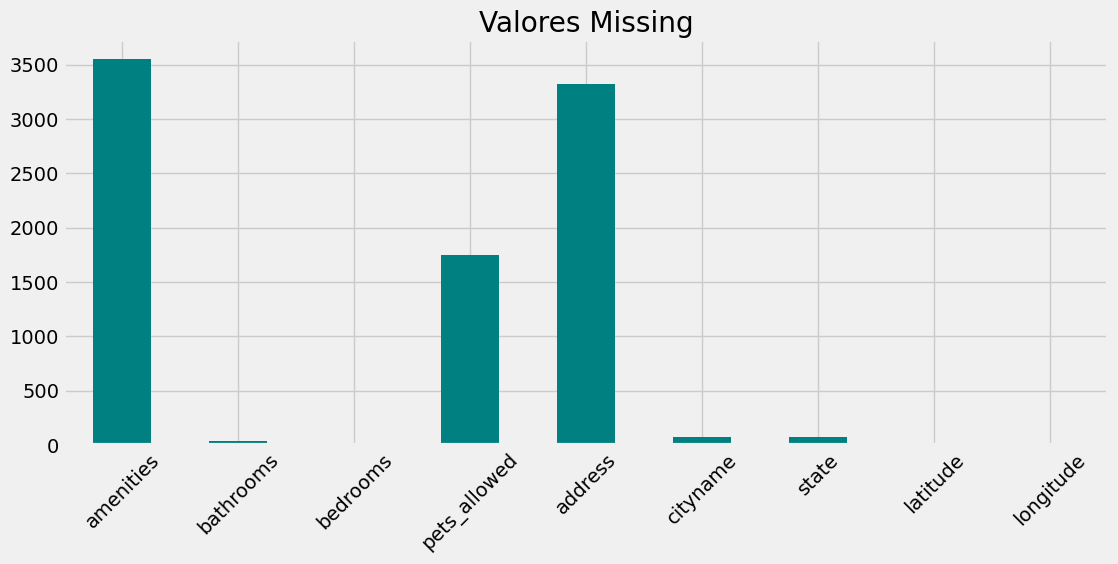

In [8]:
# contexto para la definición y liempieza de datos
# se crea variable que contiene todas columnas con valores Na, NaN
missing = deptos.isna().sum()

# se filtra por valores mayores a cero con dtype: int64
missing = missing[missing > 0]

print('Cantidad de Valores Nulos:')
print('==========================')
display(missing)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 5))
plt.title('Valores Missing')
missing.plot.bar(color='teal')
plt.xticks(rotation = 45) # Rotación de X-Axis en 45°
plt.show()

In [9]:
# existen dos atributos en la misma serie de datos, la reflexion es que se permiten mascotas en algunos casos,
# ya sean perros, gatos, perros y gatos, el valor None se infiere que no existe información.
deptos['pets_allowed'].value_counts()

Cats,Dogs    5228
None         2415
Cats          485
Dogs          124
Name: pets_allowed, dtype: int64

In [10]:
deptos['category'].value_counts()
# la data es con foco en información de casa/arriendo/departamento

housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: category, dtype: int64

In [11]:
deptos['has_photo'].value_counts()

#Thumbnail = miniatura

Thumbnail    8907
Yes           909
No            184
Name: has_photo, dtype: int64

In [12]:
deptos['price_type'].value_counts()
# los departamentos de arriendan de manera mensual...

Monthly           9998
Weekly               1
Monthly|Weekly       1
Name: price_type, dtype: int64

> <font color='darkcyan'><b><h2>Proceso Agile EDA</h2></b></font>
>


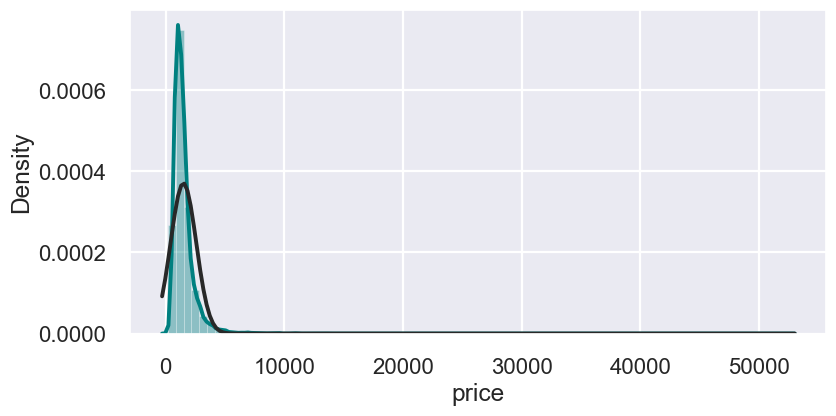

In [13]:
from scipy.stats import norm, beta

sns.set()
plt.style.use('seaborn-poster')

plt.figure(figsize=(8, 4))
sns.distplot(deptos['price'], bins=80, kde=True, hist=True, fit=norm, color='teal');

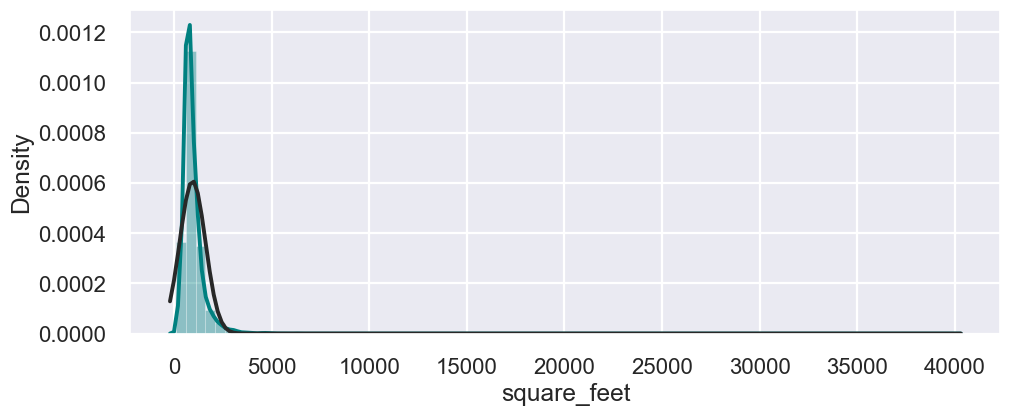

In [14]:
plt.figure(figsize=(10, 4))
sns.distplot(deptos['square_feet'], bins=80, kde=True, hist=True, fit=norm, color = 'teal');

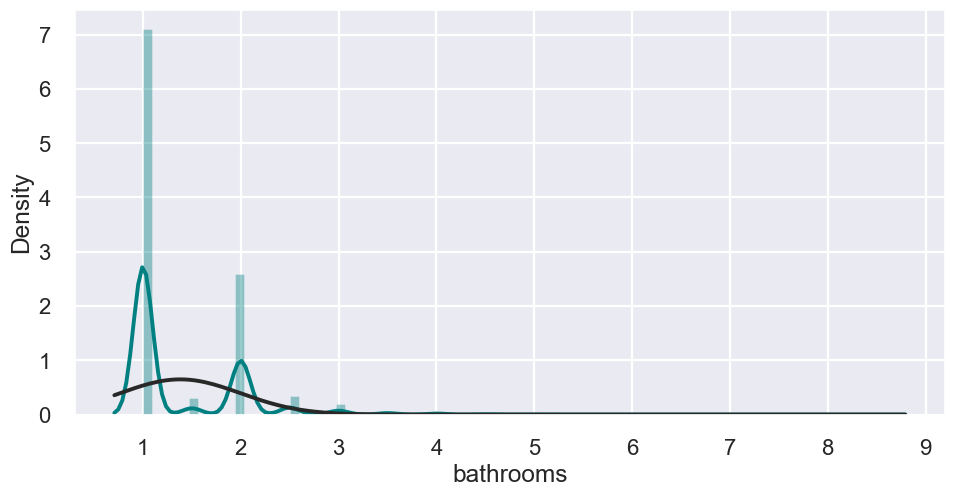

In [15]:
plt.figure(figsize=(10, 5))
sns.distplot(deptos['bathrooms'] , bins=80, kde=True, hist=True, fit=norm, color = 'teal');

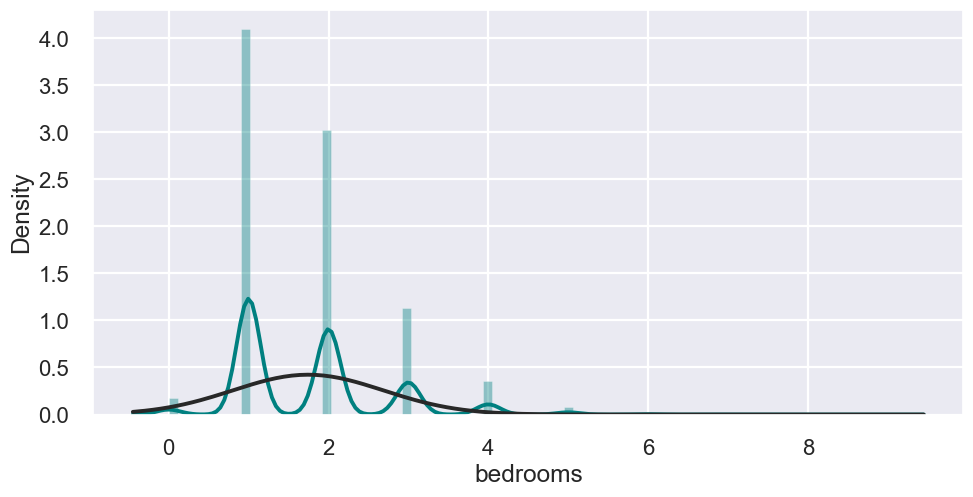

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(deptos['bedrooms'] , bins=80, kde=True, hist=True, fit=norm, color = 'teal');

In [17]:
deptos.describe()

id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09  
50%      38.809800   -93.651600  1.577358e+09  
75%      41.349800   -82.209975  1.577359e+09  
max      61.594000   -70.191600  1.577362e+09

> <font color='darkcyan'><b><h2>Variables a utilizar</h2></b></font>
>


In [18]:
df = deptos.copy()

In [19]:
df = df[['bathrooms','bedrooms','price','square_feet']]

In [20]:
df.head()

bathrooms  bedrooms  price  square_feet
0        NaN       0.0    790          101
1        NaN       1.0    425          106
2        1.0       0.0   1390          107
3        1.0       0.0    925          116
4        NaN       0.0    880          125

In [21]:
df.tail()

bathrooms  bedrooms  price  square_feet
9995        4.0       5.0   6000         6300
9996        8.0       6.0  25000         8716
9997        8.5       6.0  11000        11318
9998        NaN       1.0   4790        40000
9999        1.0       1.0   1009          880

- Existen casos en donde no hay feedback del número de baños y de dormitorios lo que lleva a inferir que a pesar de tener información del precio tal información quizás no fue publicada por el anunciante.

In [22]:
df.describe()

bathrooms     bedrooms         price   square_feet
count  9966.000000  9993.000000  10000.000000  10000.000000
mean      1.380544     1.744021   1486.277500    945.810500
std       0.615410     0.942354   1076.507968    655.755736
min       1.000000     0.000000    200.000000    101.000000
25%       1.000000     1.000000    949.000000    649.000000
50%       1.000000     2.000000   1270.000000    802.000000
75%       2.000000     2.000000   1695.000000   1100.000000
max       8.500000     9.000000  52500.000000  40000.000000

In [23]:
df.isna().sum()

bathrooms      34
bedrooms        7
price           0
square_feet     0
dtype: int64

In [24]:
(df.isna().sum() / len(df))*100

# los valores NA son hasta un 0.34% respecto del total del dataset

bathrooms      0.34
bedrooms       0.07
price          0.00
square_feet    0.00
dtype: float64

In [25]:
perc = 0.33

# se define la minima cantidad de columnas en función de porcentaje de NaN econtrados 0.33%
min_count = int(((100-perc)/100)*df.shape[1]+1)

# se eliminan los NaN con el umbral de la variable anterior y se crea el dataframe df_mod
df_mod = df.dropna(axis=0, thresh= min_count)


In [26]:
df_mod.isna().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
dtype: int64

In [27]:
df_mod.describe()

bathrooms     bedrooms         price   square_feet
count  9960.000000  9960.000000   9960.000000   9960.000000
mean      1.380321     1.746988   1487.090763    942.916767
std       0.615212     0.941315   1077.009033    526.463071
min       1.000000     0.000000    200.000000    107.000000
25%       1.000000     1.000000    949.000000    650.000000
50%       1.000000     2.000000   1274.500000    803.000000
75%       2.000000     2.000000   1695.000000   1100.000000
max       8.500000     9.000000  52500.000000  11318.000000

In [28]:
df_dep = df_mod.copy()

In [29]:
# Estandarización de variables

from sklearn.preprocessing import StandardScaler

colnames = ['bathrooms', 'bedrooms', 'price', 'square_feet']

rb = StandardScaler()
df_dep = rb.fit_transform(df_dep)
df_dep = pd.DataFrame(df_dep, columns=colnames)
df_dep.head()

bathrooms  bedrooms     price  square_feet
0  -0.618226 -1.855995 -0.090153    -1.587877
1  -0.618226 -1.855995 -0.521926    -1.570781
2  -0.618226 -1.855995  0.917317    -1.544187
3  -0.618226 -1.855995  0.007344    -1.528991
4  -0.618226 -1.855995  0.193053    -1.430213

> <font color='darkcyan'><b><h2>Cluster DBSCAN</h2></b></font>
>


<p style='text-align: justify;'><B>DBSCAN</B> significa «Density-based Spatial Clustering of Applications with Noise» (Clustering espacial basado en densidad de aplicaciones con ruido). Esta técnica es una de las más comunes de algoritmos de clustering, que funciona en base a la densidad del objeto. DBSCAN trabaja en la idea de que si un punto en particular pertenece a un cluster, debería estar cerca de un montón de otros puntos en ese cluster.
Funciona en base a 2 parámetros: Radio y Puntos Mínimos. El radio, R, determina una longitud específica que, si incluye suficientes puntos dentro de él, lo llamamos de «Área densa». Los Puntos Mínimos, M, determina la cantidad mínima de datos que queremos alrededor de otra observación para definir un cluster.</p>

Parámetros
El algoritmo DBSCAN requiere básicamente 2 parámetros:

<p style='text-align: justify;'>Épsilon (eps): especifica lo cerca que deben estar los puntos entre sí para ser considerados parte de un clúster. Esto significa que, si la distancia entre dos puntos es menor o igual a este valor de épsilon, estos puntos se consideran vecinos.</p>

<p style='text-align: justify;'>Puntos mínimos (minPts): el número mínimo de puntos para formar una región densa. Por ejemplo, si establecemos minPts como 5, entonces necesitamos al menos 5 puntos para formar una región densa.</p>

<p style='text-align: justify;'>En este algoritmo, tenemos tres tipos de puntos de datos. Podemos categorizar cada punto de datos en punto de núcleo, punto de borde y punto de ruido.</p>

In [30]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(df_dep)
clustering.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [31]:
df_dep['ClusterDBSCAN'] = pd.Series(clustering.labels_)

print(df_dep.ClusterDBSCAN.unique().size)

df_dep[df_dep.ClusterDBSCAN==-1]

2


bathrooms  bedrooms      price  square_feet  ClusterDBSCAN
8795  -0.618226 -1.855995  47.367727     0.902451             -1
9786   2.632848  1.331196  10.690242     3.014766             -1
9907  -0.618226  3.455990   8.833154     4.657889             -1
9933   4.258385  4.518387  12.500903     5.890706             -1
9951   5.883921  2.393593  16.725778     7.706689             -1
9957  10.760532  4.518387  21.832769    14.765468             -1
9958  11.573301  4.518387   8.833154    19.708133             -1

> <font color='darkcyan'><b><h2>Cluster TSNE y PCA </h2></b></font>
>


Text(0.5, 0.98, 'Comparación de Cluster visualizando el uso de TSNE2D vs PCA2D')

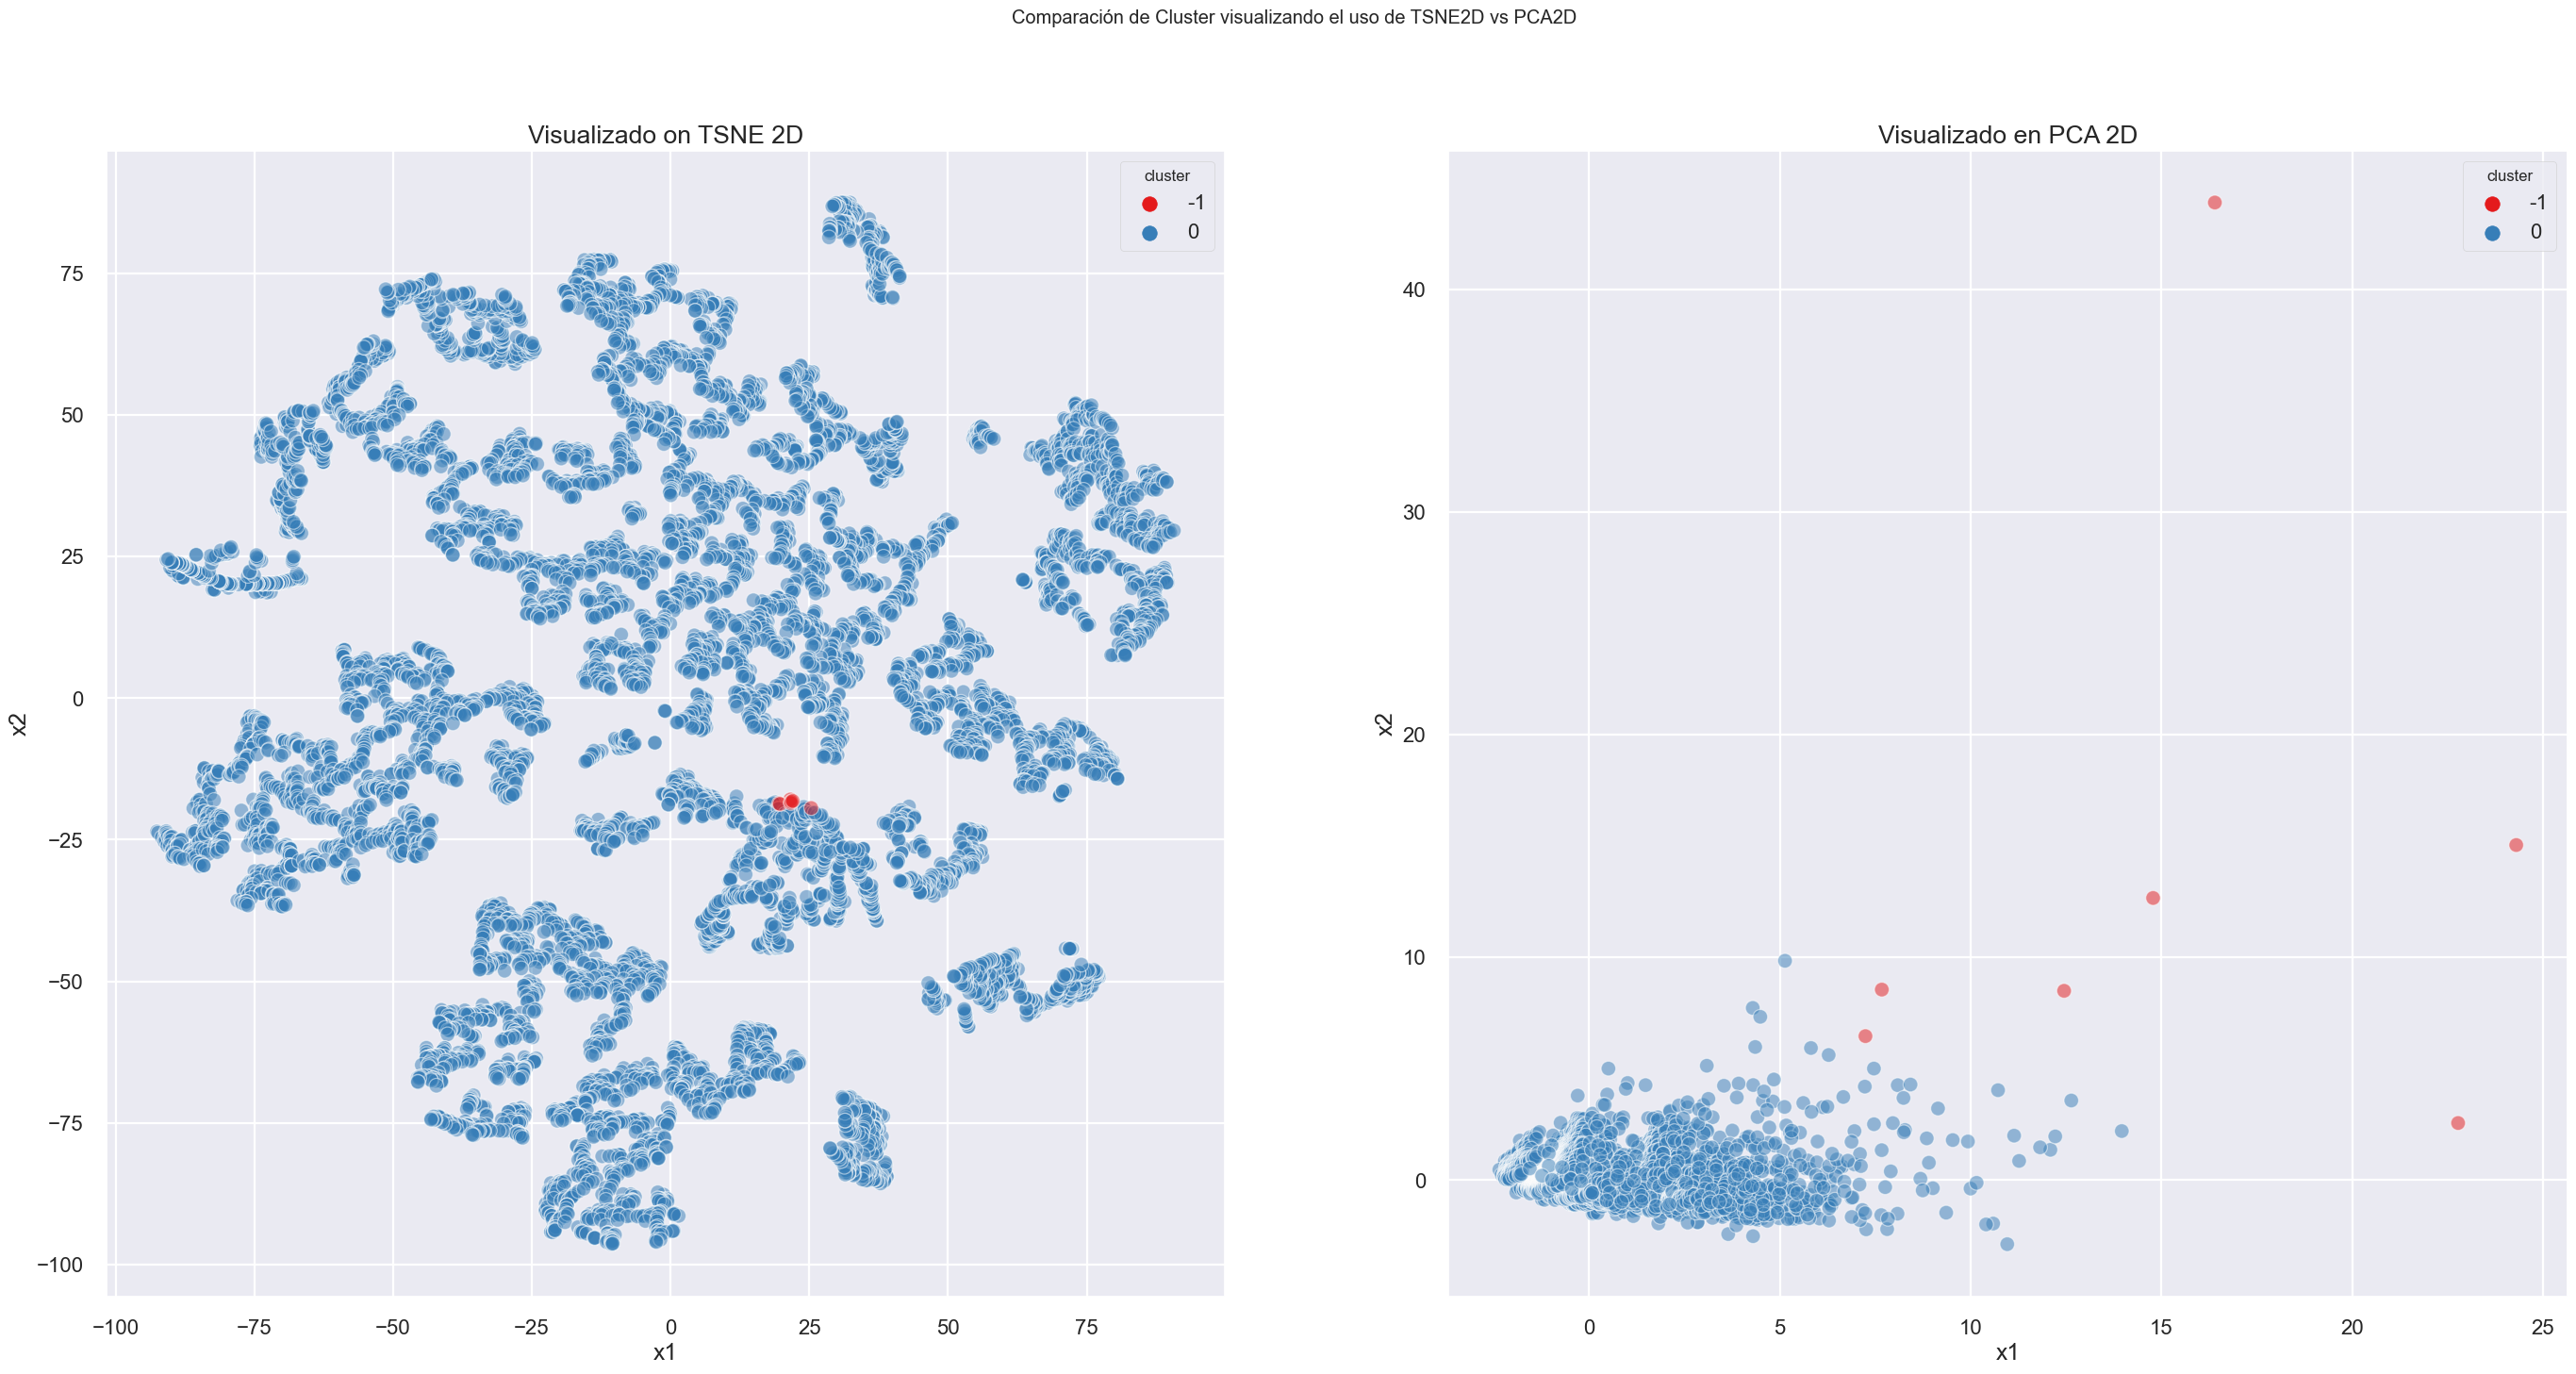

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = df_dep.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clustering.labels_
dftsne.columns = ['x1','x2','cluster']

pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(df_dep)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = clustering.labels_
dfskillsPCA2.columns = ['x1','x2','cluster']

fig, ax = plt.subplots(1, 2, figsize=(30,15))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette="Set1", ax=ax[0])
ax[0].set_title('Visualizado on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette="Set1",ax=ax[1])
ax[1].set_title('Visualizado en PCA 2D')
fig.suptitle('Comparación de Cluster visualizando el uso de TSNE2D vs PCA2D')
#display(fig)

In [33]:
# Se describe la forma del primer dataframe en contraste con el segundo dataset
df_dep.shape, df_mod.shape

((9960, 5), (9960, 4))

In [34]:
df_dep.head()

bathrooms  bedrooms     price  square_feet  ClusterDBSCAN
0  -0.618226 -1.855995 -0.090153    -1.587877              0
1  -0.618226 -1.855995 -0.521926    -1.570781              0
2  -0.618226 -1.855995  0.917317    -1.544187              0
3  -0.618226 -1.855995  0.007344    -1.528991              0
4  -0.618226 -1.855995  0.193053    -1.430213              0

In [35]:
df_mod.head()

bathrooms  bedrooms  price  square_feet
2         1.0       0.0   1390          107
3         1.0       0.0    925          116
5         1.0       0.0   2475          130
8         1.0       0.0   1495          138
14        1.0       0.0   1695          190

In [36]:
# se procesa ambos data set, el de origen com el tratado a posterios para realizar su integracion y contraste
lr = df_dep[df_dep.ClusterDBSCAN==-1].index

df_dep.drop(list(df_dep[df_dep.ClusterDBSCAN==-1].index), inplace=True)
df_mod.drop(list(lr), inplace=True)

df_dep.reset_index(drop=True, inplace=True)
df_mod.reset_index(drop=True, inplace=True)

df_dep.shape, df_mod.shape

del df_dep['ClusterDBSCAN']

D:\04_Miniconda_Install\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


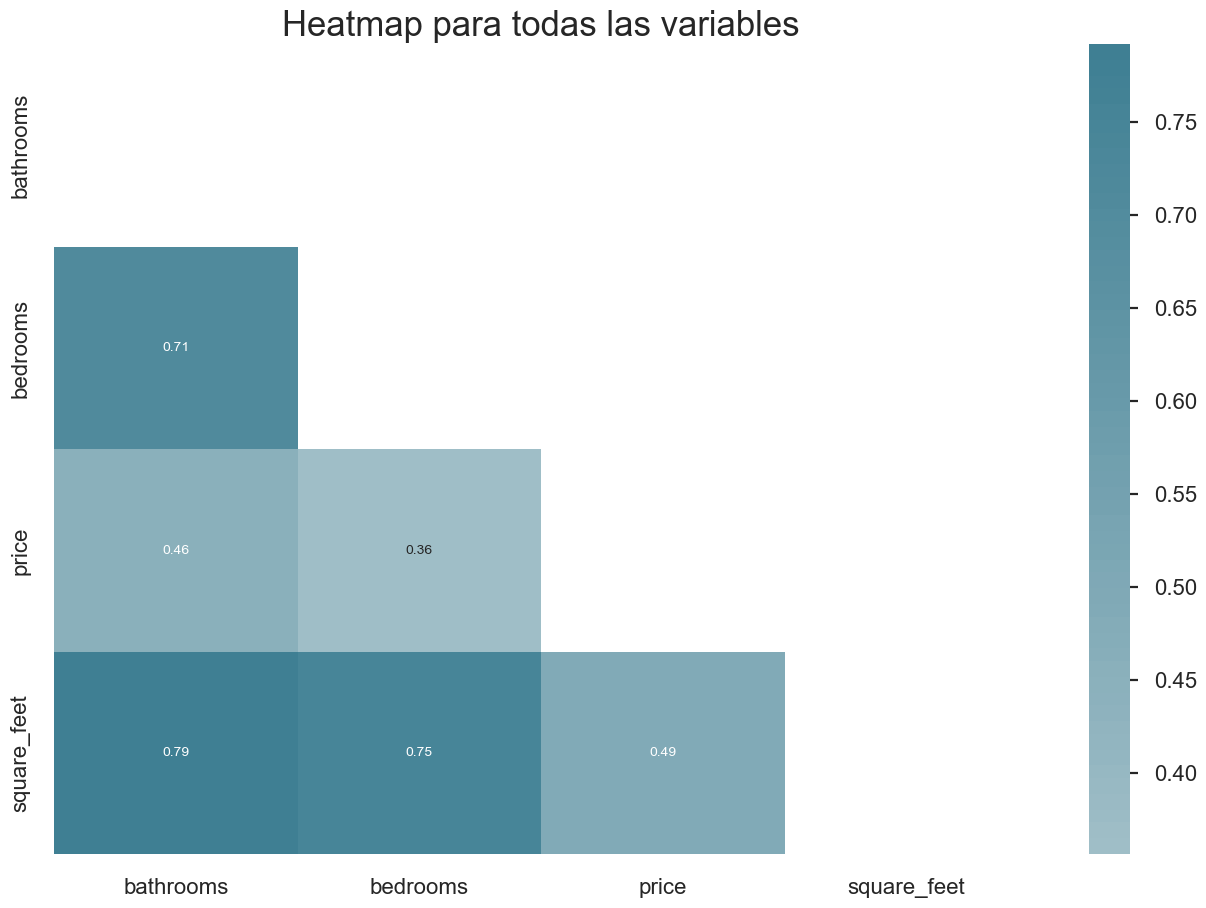

In [37]:
import matplotlib.style as style

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (14,10))

# Se generará un enmascarado del triangulo superior (se toma desde libreria seaborn)
mask = np.zeros_like(df_dep.corr(), dtype='bool')
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_dep.corr(), cmap= sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );

## Se genera el titulo
plt.title("Heatmap para todas las variables", fontsize = 25);

> <font color='darkcyan'><b><h2>Cluster GMM (Gaussian Mixture Models) </h2></b></font>
>
><b>Input:</b>

><p style='text-align: justify;'>Aunque GMM a menudo se clasifica como un algoritmo de agrupamiento, fundamentalmente es un algoritmo para la estimación de densidad.</p>
>
><p style='text-align: justify;'>Es decir, el resultado de un ajuste GMM a algunos datos técnicamente no es un modelo de agrupamiento, sino un modelo probabilístico generativo. Modelo que describe la distribución de los datos. De lo observado en blog web me pareció algo novedoso para usar en el resultado para kmeans.</p>


In [38]:
df_dep.tail()

bathrooms  bedrooms     price  square_feet
9948   5.883921  2.393593  2.797619     8.479811
9949   5.883921  3.455990  5.026124     9.036383
9950   4.258385  4.518387  1.404803     9.456187
9951   4.258385  3.455990  4.190434    10.176122
9952  -0.618226 -0.793598 -0.443928    -0.119514

In [39]:
df_mod.tail()

bathrooms  bedrooms  price  square_feet
9948        4.0       6.0   3000         5921
9949        4.0       5.0   6000         6300
9950        8.0       6.0  25000         8716
9951        8.5       6.0  11000        11318
9952        1.0       1.0   1009          880

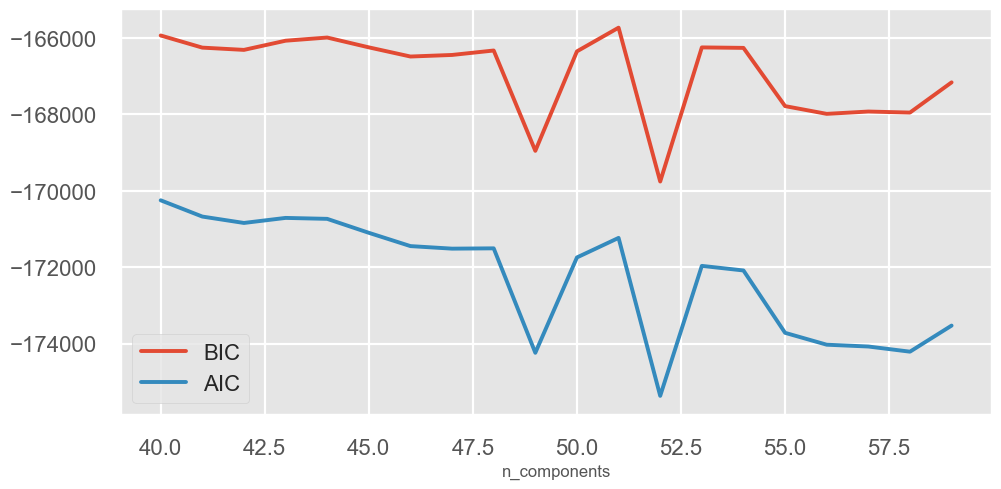

In [40]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(40, 60)
models = [GMM(n, covariance_type='full', random_state=0).fit(df_dep)
          for n in n_components]
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(n_components, [m.bic(df_dep) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_dep) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [41]:
gmm = GMM(n_components=51, covariance_type='diag', max_iter=300, random_state=42).fit(df_dep)
labels = gmm.predict(df_dep)

# Se añade un columna y su lista de atrubutos denominado Cluster GMM.
df_mod['Cluster_GMM'] = list(labels)
df_mod.head()

C:\Users\DESCOBAR\AppData\Local\Temp\ipykernel_13700\1255154955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['Cluster_GMM'] = list(labels)


bathrooms  bedrooms  price  square_feet  Cluster_GMM
0        1.0       0.0   1390          107           22
1        1.0       0.0    925          116           22
2        1.0       0.0   2475          130           22
3        1.0       0.0   1495          138           22
4        1.0       0.0   1695          190           22

In [42]:
labels

array([22, 22, 22, ..., 43, 43,  9], dtype=int64)

In [43]:
df_dep.shape, df_mod.shape

((9953, 4), (9953, 5))

In [44]:
df_dep['Cluster_GMM'] = list(labels)
df_dep.head()

bathrooms  bedrooms     price  square_feet  Cluster_GMM
0  -0.618226 -1.855995 -0.090153    -1.587877           22
1  -0.618226 -1.855995 -0.521926    -1.570781           22
2  -0.618226 -1.855995  0.917317    -1.544187           22
3  -0.618226 -1.855995  0.007344    -1.528991           22
4  -0.618226 -1.855995  0.193053    -1.430213           22

In [45]:
# Se almacena respaldo para uso posterior y estara disponible en GITHUB
import os

path = 'C:/Users/DESCOBAR/Downloads'
filename = 'df_dep_w_gmmcluster.csv'

fullpath = os.path.join(path, filename)

df_dep.to_csv(fullpath, index=False)      

In [46]:
# se elimina la columna GMM
del df_dep['Cluster_GMM']

Text(0.5, 0.98, 'Comparación de Cluster visualizando el uso de TSNE2D vs PCA2D')

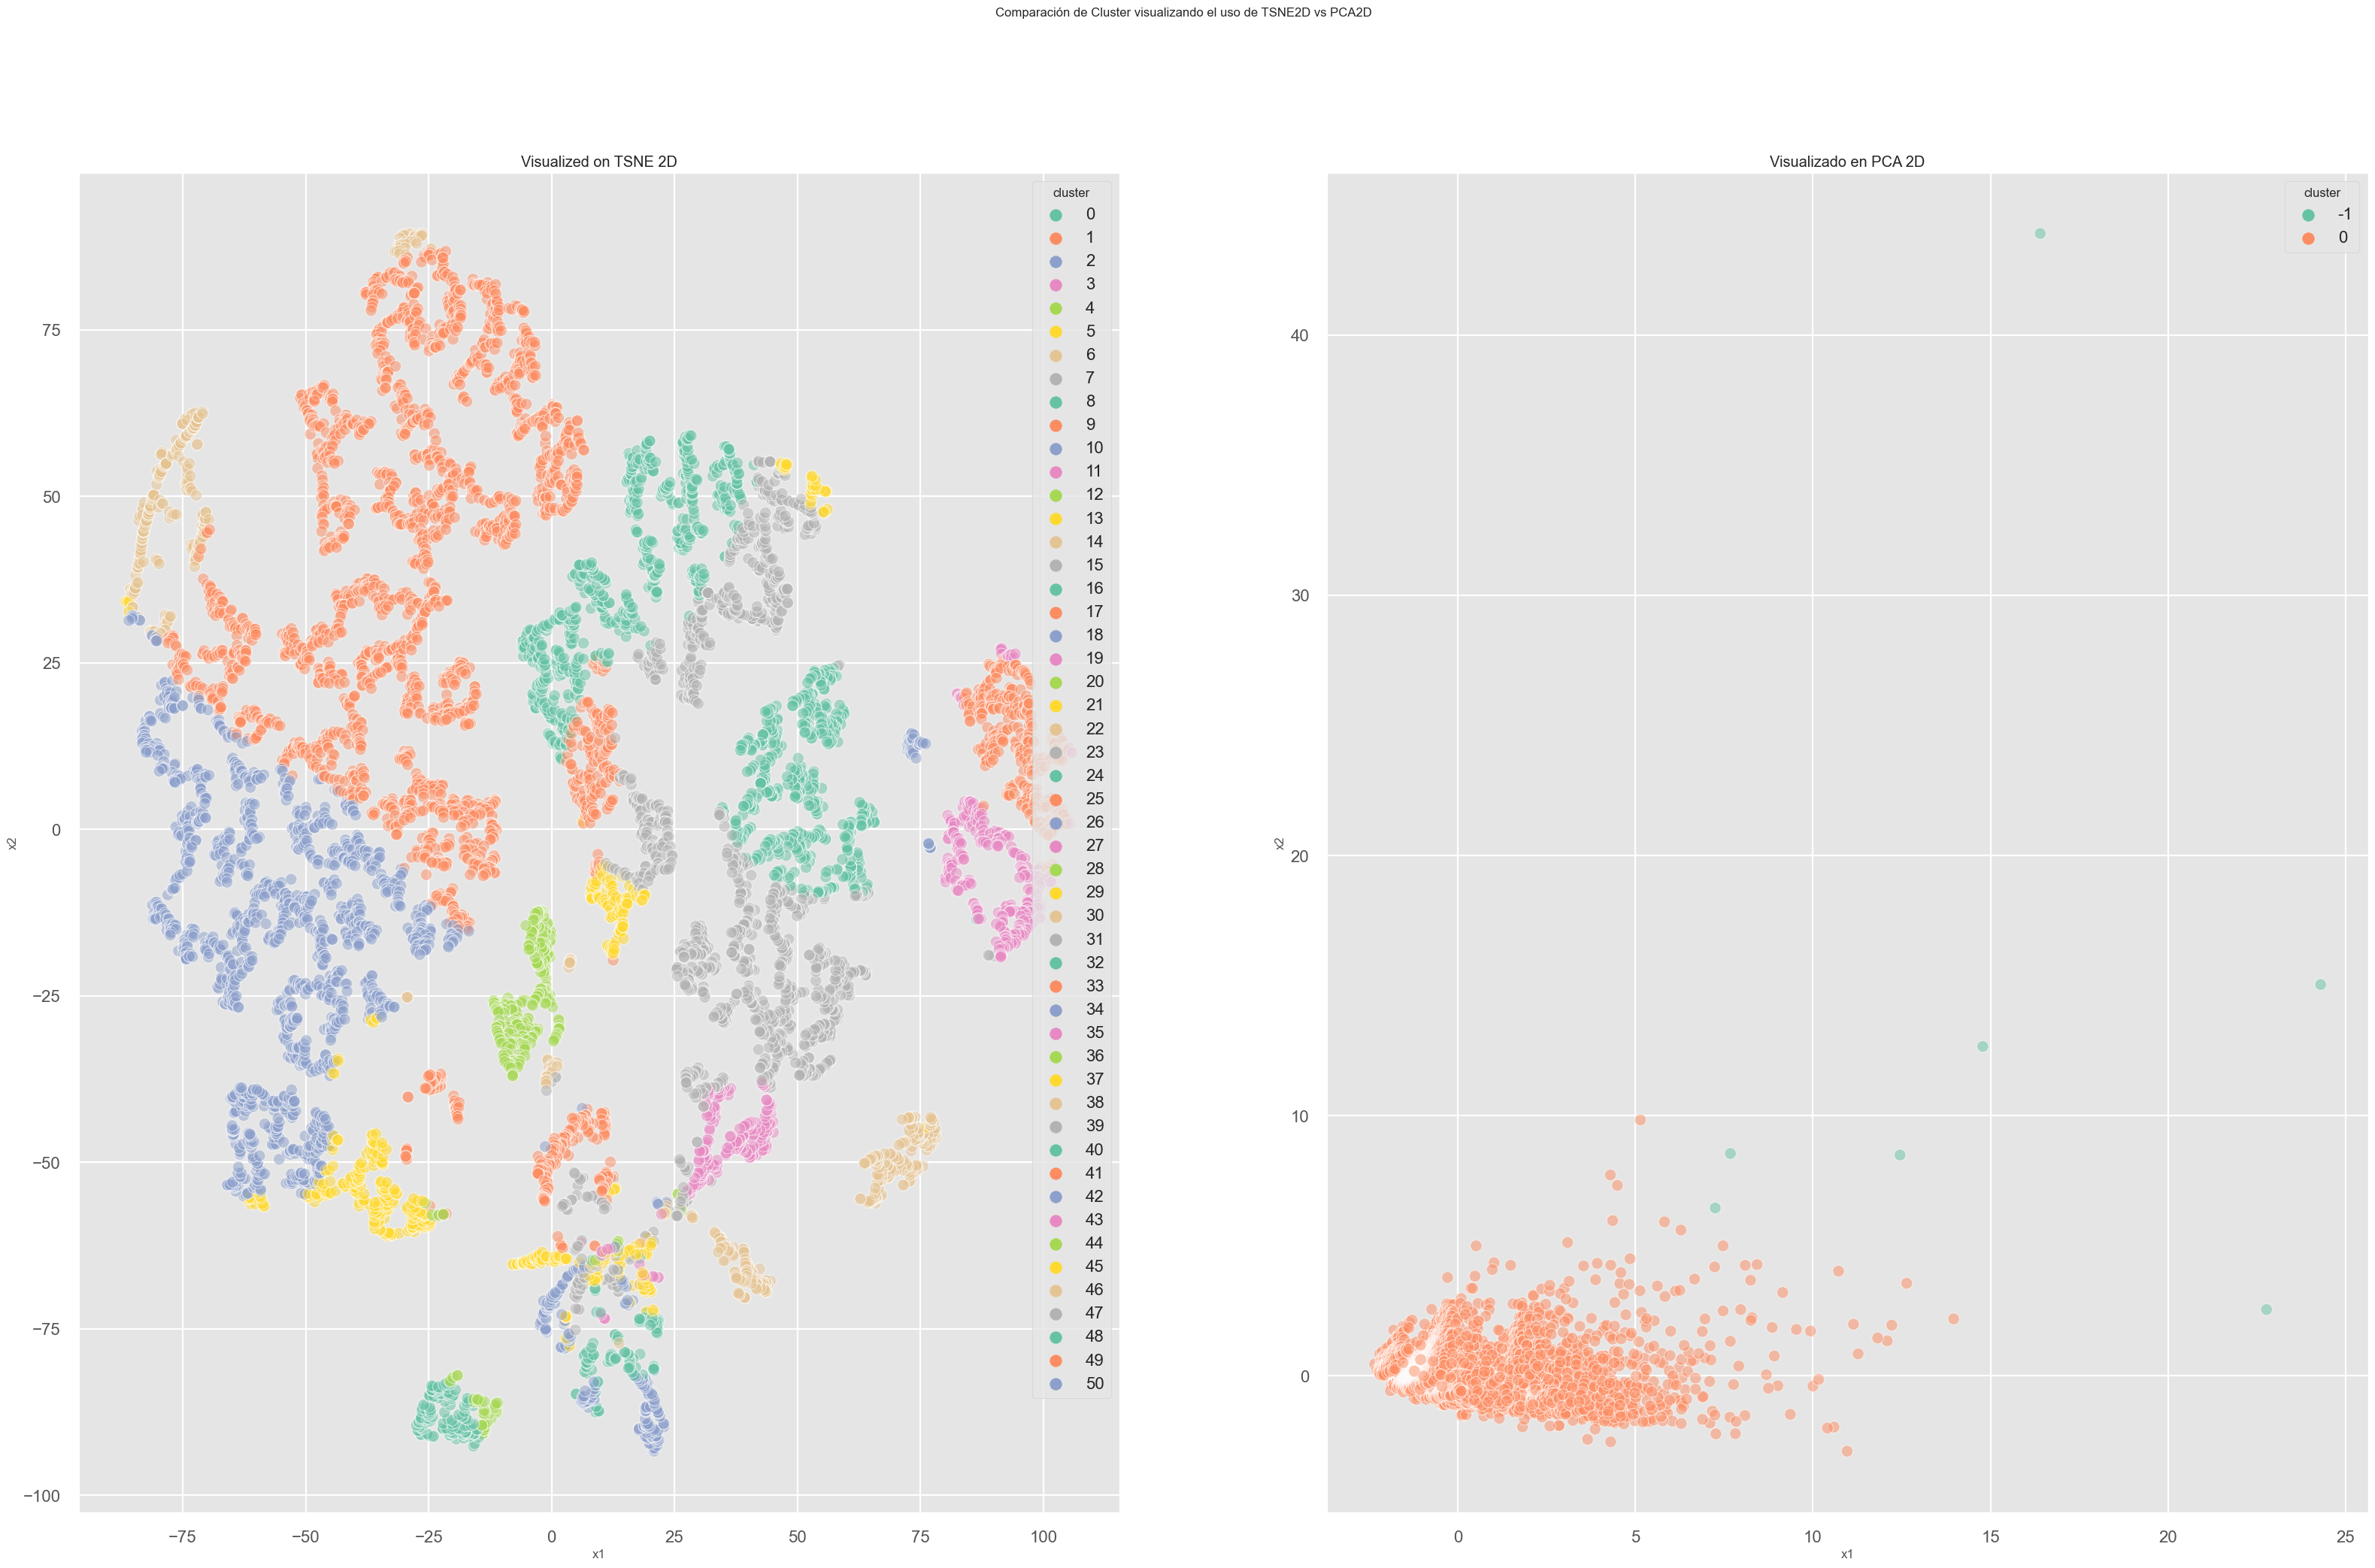

In [47]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = df_dep.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = labels
dftsne.columns = ['x1','x2','cluster']

pca2 = PCA(n_components=2)
skPCA2 = pca2.fit_transform(df_dep)
dfskPCA2 = pd.DataFrame(skPCA2)
dfskPCA2['cluster'] = labels
dfskPCA2.columns = ['x1','x2','cluster']

fig, ax = plt.subplots(1, 2, figsize=(35,22))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette="Set2", ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette="Set2",ax=ax[1])
ax[1].set_title('Visualizado en PCA 2D')
fig.suptitle('Comparación de Cluster visualizando el uso de TSNE2D vs PCA2D')
#display(fig)

> <font color='darkcyan'><b><h2>KMEANS (con estimación de densidad en sus variables) </h2></b></font>
>
><b>Input:</b>

><p style='text-align: justify;'>Los resultados de k-means son sensibles al orden de las observaciones, y vale la pena ejecutar el algoritmo varias veces, mezclando los datos en el medio, promediando los grupos resultantes y ejecutando las evaluaciones finales con los centros de los grupos promediados como puntos de partida. Por efectos de tiempo y el trabajo solo lo ejecute solo una vez.</p>
>

In [50]:
# Se usa dataset con variable Cluster
import os

path = 'C:/Users/DESCOBAR/Downloads'
filename = 'df_dep_w_gmmcluster.csv'

fullpath = os.path.join(path, filename)

In [51]:
df_kms = pd.read_csv(fullpath)
df_kms.head()

bathrooms  bedrooms     price  square_feet  Cluster_GMM
0  -0.618226 -1.855995 -0.090153    -1.587877           22
1  -0.618226 -1.855995 -0.521926    -1.570781           22
2  -0.618226 -1.855995  0.917317    -1.544187           22
3  -0.618226 -1.855995  0.007344    -1.528991           22
4  -0.618226 -1.855995  0.193053    -1.430213           22

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4).fit(df_kms)
pca_samples = pca.transform(df_kms)
pca.fit(df_kms)


#cumulative explaned variance
print (np.cumsum(pca.explained_variance_ratio_))

[0.97863318 0.99411792 0.99713135 0.9988339 ]


In [53]:
pca = PCA(n_components=4).fit(df_kms)
reduced_data = pca.transform(df_kms)

35 clusters: 0.7932
34 clusters: 0.78707
33 clusters: 0.78613
32 clusters: 0.78167
31 clusters: 0.78203
30 clusters: 0.78769
29 clusters: 0.78114
28 clusters: 0.77873
27 clusters: 0.77254
26 clusters: 0.77908
25 clusters: 0.8057
24 clusters: 0.79738
23 clusters: 0.79831
22 clusters: 0.79249
21 clusters: 0.79451
20 clusters: 0.793
19 clusters: 0.7792
18 clusters: 0.78077


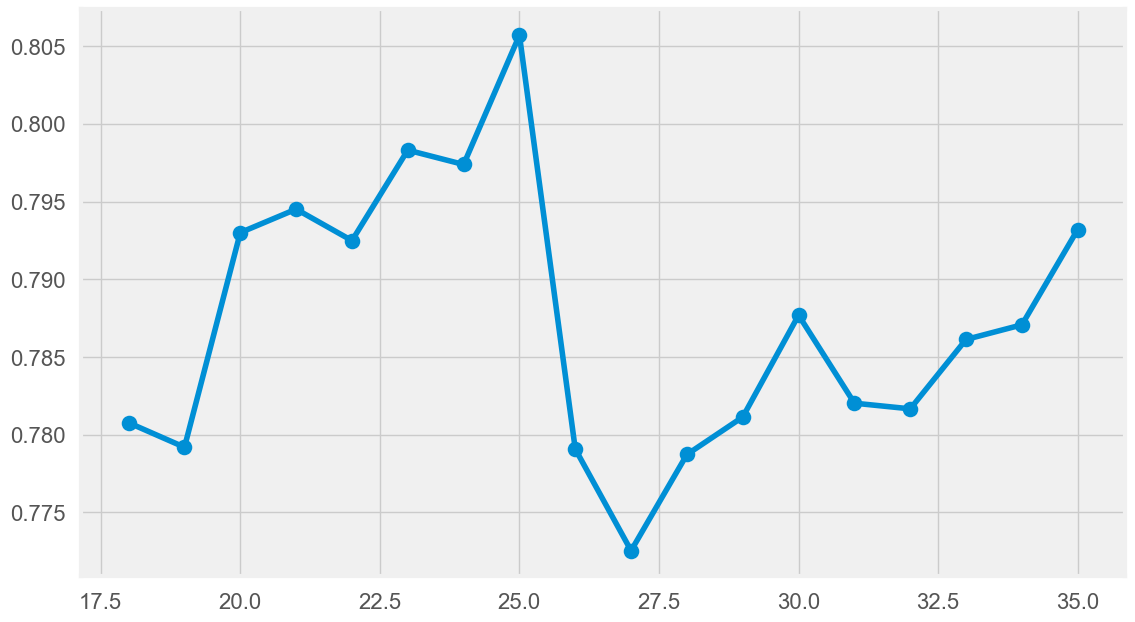

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#mantener los scores para cada tamaño de cluster
sil_scores = []

random_state = 7

for i in range(35,17,-1):
    clusterer = KMeans(i, random_state=random_state).fit(reduced_data)
    # TODO: Predecir el cluster por cada uno de los puntos
    preds = clusterer.predict(reduced_data)

    # TODO: Buscar el centro de los cluster
    centers = clusterer.cluster_centers_

    # TODO: Predecir el cluster por cada uno de los puntos
   # sample_preds = clusterer.predict(home)

    # TODO: Calcular la media del coeficiente de silhouette para el número de cluster mostrados
    score = silhouette_score(reduced_data, preds)
    sil_scores.append(score)
    print(i, 'clusters:', score.round(5))

# plot del score
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.style.use("fivethirtyeight")
_ = plt.plot(np.arange(35,17,-1), sil_scores, '-o')

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

km = KMeans(init='random', n_clusters=21, verbose=0,
            n_init=1, max_iter=200,)
km.fit(reduced_data)

l = km.labels_

print("LABLES")
print(l)

LABLES
[13 13 13 ... 18 18  1]


In [56]:
# se añaden al dataset inicial el Cluster GMM y Cluster Kmeans
df_mod['Cluster_Km'] = list(pd.Series(l))
df_mod.head(20)

C:\Users\DESCOBAR\AppData\Local\Temp\ipykernel_13700\736488330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['Cluster_Km'] = list(pd.Series(l))


bathrooms  bedrooms  price  square_feet  Cluster_GMM  Cluster_Km
0         1.0       0.0   1390          107           22          13
1         1.0       0.0    925          116           22          13
2         1.0       0.0   2475          130           22          13
3         1.0       0.0   1495          138           22          13
4         1.0       0.0   1695          190           22          13
5         1.0       1.0   1560          200           14          15
6         1.0       1.0   1560          200           14          15
7         1.0       1.0   1000          200           14          15
8         1.0       1.0    950          200           14          15
9         1.0       1.0    625          200           14          15
10        1.0       1.0    600          200           14          15
11        1.0       1.0    544          200           14          15
12        1.0       1.0    525          200           14          15
13        1.0       1.0    450          200           14          15
14        1.0       1.0    750          215           14          15
15        1.0       1.0   2000          219            5          19
16        1.0       1.0   1400          219           14          15
17        1.0       1.0   1095          219           14          15
18        1.0       1.0    915          219           14          15
19        1.0       1.0    900          219           14          15

In [57]:
# Se almacena respaldo para uso posterior, estara disponible en GITHUB
import os

path = 'C:/Users/DESCOBAR/Downloads'
filename = 'df_mod_clusters_full.csv'

fullpath = os.path.join(path, filename)

df_dep.to_csv(fullpath, index=False)    

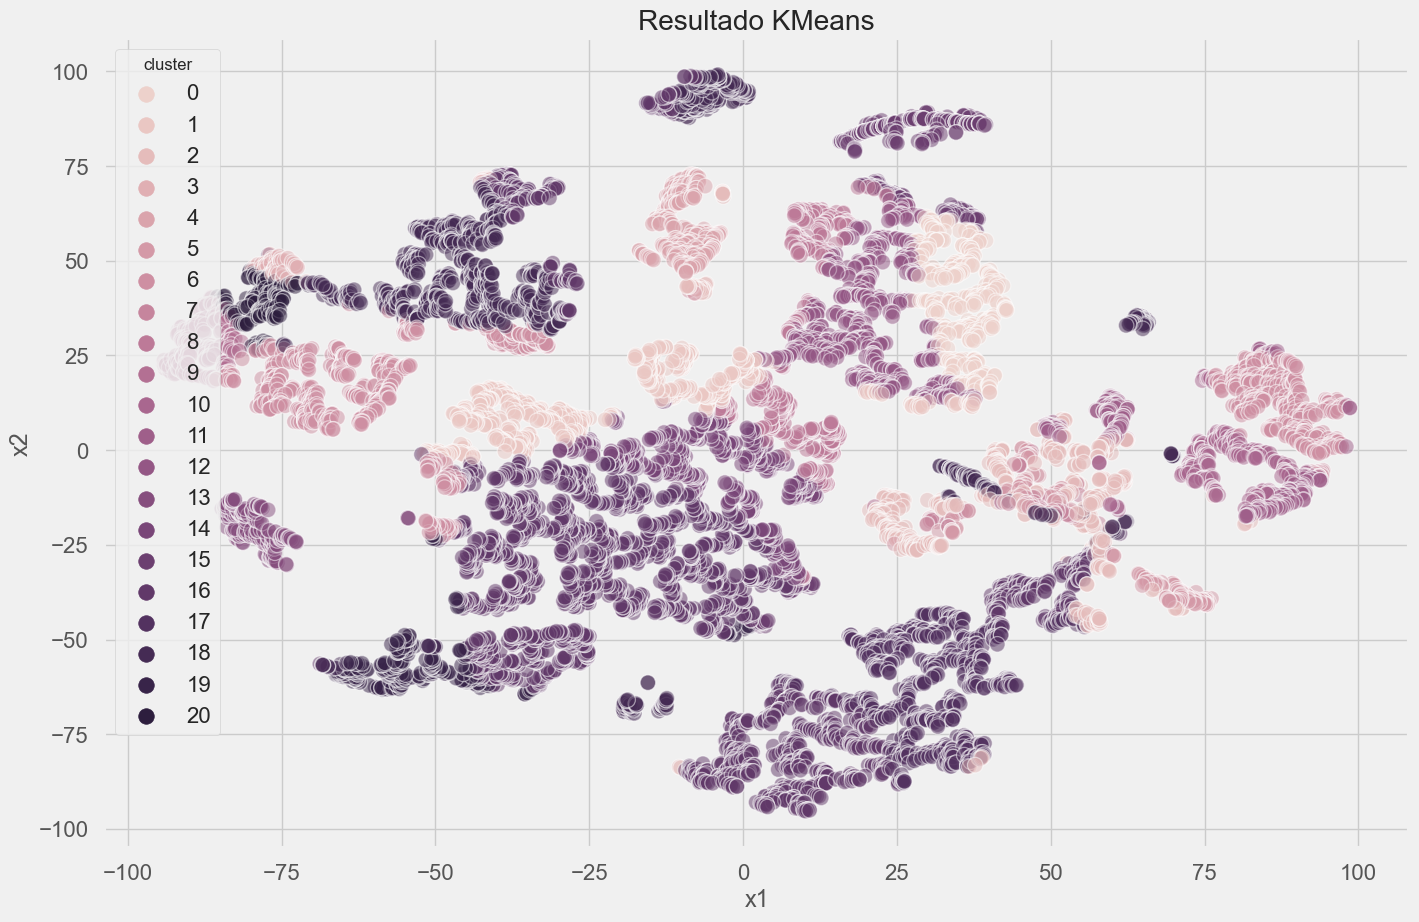

In [58]:
from sklearn.manifold import TSNE

X = df_dep.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = km.labels_
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(15,10))
plt.title('Resultado KMeans')
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)
del X

> <font color='darkcyan'><b><h2>BIRCH (Balanced Iterative Reducing and Clusteirng using Herarchies) </h2></b></font>
>
><b>Input:</b>

><p style='text-align: justify;'>Es un tipo de clustering comúnmente usado para grandes data-sets (conjunto de datos). Este tipo de clusterización es muy usada cuando la escalabilidad de los datos aumenta (mayormente en numerosidad que en dimensionalidad) y algunos algoritmos escalan pobremente en términos de tiempo de compilación. Birch tiene como objetivo reducir el número de datos que se ingresan como inputs, generando datos que resumen el data set original. Para realizar esta reducción se recurre a un Clustering Feature Tree (Arbol de Características de Agrupamiento) que tiene una estructura similar al arbol B+ balanceado. En la siguiente figura se muestra cómo se crea el árbol antes mencionado:.</p>
>


In [59]:
from sklearn.cluster import Birch

#from sklearn.mixture import GMM
birch = Birch(threshold=.5, branching_factor=50, n_clusters=20).fit(df_dep)
birch_labels = birch.predict(df_dep)
#plt.scatter(home.iloc[:, 2], home.iloc[:, 8], c=labels, s=40, cmap='viridis');

D:\04_Miniconda_Install\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  warnings.warn(


In [60]:
birch_labels

array([19, 19, 19, ...,  3, 17, 19], dtype=int64)

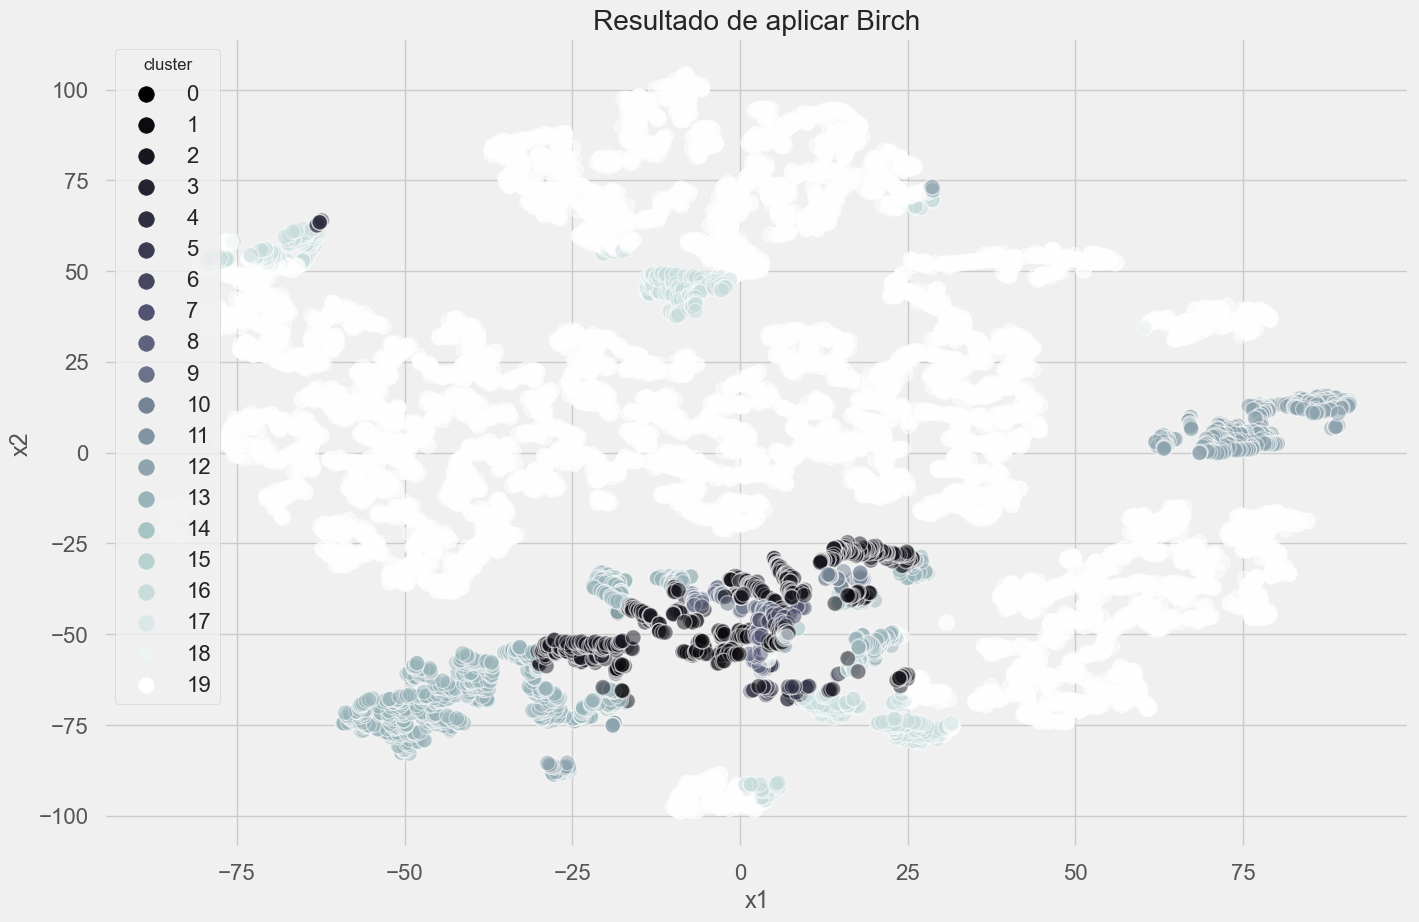

In [61]:
from sklearn.manifold import TSNE

X = df_dep.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = birch_labels
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(15,10))
plt.title('Resultado de aplicar Birch')
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",palette='bone', alpha=0.5)
del X

> <font color='darkcyan'><b><h2>Conclusiones</h2></b></font>
>


><p style='text-align: justify;'>El objetivo de este trabajo fue en lo posible aplicar algoritmos de clustering a un proceso de clasificacion de inmuebles, el cual proviene de una fuente de EEUU. A lo largo de este trabajo, se han estudiado distintos algoritmos como  <b>DBSCAN</b>, <b>GMM</b>, <b>KMEANS</b>, <b>BIRCH</b>  así como herramientas relacionadas con tratamiento de datos, como lo fue jupyter notebook. Fue un tema que no había tocado con practica en el hacer, de hecho algunos proceso tuve que >analizarlos de textos, blogs, y material de otras universidades.</p>
   
><p style='text-align: justify;'>En lo que respecta a los departamentos, nos ofrece una fuente de información con rasgos claramente gringos en lo que respecta a como ellos generan sus publicaciones de ofertas de este tipo. Se ha visto que las varibles poseen ruido, sin embargo, muy sujeto al como desde mi perspectiva le entrego valor en esta lógica. Las publicaciones poseen atributos que a mi juicio no entrega un detalle respecto de lo que se ofrece como inmueble.</p>


><p style='text-align: justify;'>Los métodos de clusterización empleados son muy robustos, y que claramente entregan el saber como se agrupan estos departamentos en cantidad y tamaño. Dado lo anterior creo que si existiera mayor información en las variables y cantidad estos modelos habrian entregado una visión mas amplia en la clusterización.</p>

><p style='text-align: justify;'><b>Kmeans</b> sus pros son: Rápidos centroides basados en él, se puede escalar en grandes dataset, reduce la varianza intra cluster</p>
>
><p style='text-align: justify;'><b>Kmeans</b> sus contras son: Sufre con el ruido en los datos, los outliers nunca pueden ser indetificados, se enfrenta a mínimos problemas de ubicación, no es ideal para datasets de forma no-convexa, es complicado para predecir con K valores.</p>
>

><p style='text-align: justify;'><b>DBSCAN</b> sus pros son: Resistente a los outliers, puede manipular clusters de difentes formas y tamaños, no requiere especificar el número de clusters</p>
>
><p style='text-align: justify;'><b>DBSCAN</b> sus contras son: Altamente sensible para dos parámetros Eps y Min points, no posee cluster dataset lo que genera gran varianza en densidades.</p>
>

><p style='text-align: justify;'><b>GMM</b> sus pros son: Robusto a outliers, proporciona el BIC score para parámetros seleccionados, converge rápido dada una buena inicialización</p>
>
><p style='text-align: justify;'><b>GMM</b> sus contras son: Es altamente complejo y puede ser lento en el proceso.</p>
>

><p style='text-align: justify;'><b>GMM</b> sus contras son: Es altamente complejo y puede ser lento en el proceso.</p>
>

><p style='text-align: justify;'><b>BIRCH</b> Elegir los parámetros correctos para los algoritmos de agrupamiento suele ser difícil, ya que requiere información sobre el conjunto de datos, que a menudo no está disponible. Esto también es cierto para BIRCH, que requiere el conteo de grupos k así como un umbral T para calcular los grupos correctamente.</p>
>

><p style='text-align: justify;'><b>¿De qué manera sus conclusiones podrían cambiar cuando aplique este análisis al caso chileno?<b></p>
><p style='text-align: justify;'>Finalmente, es importante comprender que estos modelos son solo un medio para encontrar segmentos de departamentos lógicos y fácilmente comprensibles a los que se pueda orientar de manera efectiva. Entonces, en la mayoría de los casos prácticos, terminaremos probando múltiples modelos y creando perfiles de departamentos a partir de cada iteración hasta que encontremos segmentos que tengan más sentido comercial. Por lo tanto, la segmentación es tanto pasa a ser desde mi punto de vista un arte como una ciencia, por lo que, las conclusiones variarian incluso hasta por efectos políticos, económicos, delincuencia del sector, salud y muchos otros.</p>
    

---
<div>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo-udla.jpg' with='50' height='15'align=center> 
</div>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---

<h2><font color='darkcyan'>Examen Machine Learning I</font></h2>
<h3><font color='IndianRed'>Problema 2: Implementando un sistema de recomendación</font></h3>

<p1><b><h3>Nombre: Didimo Escobar</h3></b></p1>

<p1><b>GitHub: https://github.com/descobardos/MG-Data-Science/tree/main/Machine%20Learning%20I</b></p1>

<p2><b>Email: descobardos@gmail.com</b></p2>
<br></br>

> El objetivo y espiritu de este proceso es evaluar los contenidos aprendidos durante este bimestre en Machine Learning I, que aborda el aprendizaje no supervisado.
>


#### Problema 2: Implementando un sistema de recomendación


<p style='text-align: justify;'>En la siguiente URL: <b>https://tinyurl.com/4hs9db8n</b> ud accederá a un repositorio donde se encuentra un dataset de compra de diferentes tipos de abarrotes. La primera columna es un identificador de boleta, la segunda es la fecha de compra y la tercera el producto comprado.</p>

<p style='text-align: justify;'>Implemente un sistema recomendador usando como base el algoritmo Apriori. Para ello, debe hacer un análisis de datos adecuado para poder ejecutar el algoritmo. Compare diferentes agrupaciones temporales y concluya.</p>

<p style='text-align: justify;'>Opcional (puntaje bonus): Si es posible, despliegue el sistema en un entorno web, de modo de constatar que el sistema recomendador funciona en un entorno e-commerce.</p>


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from apyori import apriori

plt.rcParams['figure.figsize'] = 16, 6

# settings para pandas
pd.set_option('display.max_columns', 500)

# settings para 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [51]:
# se selecciona archivo de 10.000 registros desde repositorio GITHUB
url = 'https://raw.githubusercontent.com/jorgeston/datasets/master/transacciones_abarrotes.csv'

df = pd.read_csv(url, encoding='latin-1', sep=',')

> <font color='darkcyan'><b><h2>Reflexión general </h2></b></font>
>


In [52]:
df.shape

(38765, 3)

In [53]:
#Cuenta el numero de elementos unicos en un axis especifico. Puede ingnorar valores NaN
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [54]:
#primeros cinco registros
df.head(n=5)

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [55]:
#ultimos cinco registros
df.tail(n=5)

Member_number        Date        itemDescription
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

In [56]:
# se identifica la forma del dataset
print(f'La cantidad de columnas del dataset es de: \033[94m {df.shape[1]} \033[0m y la cantidad de filas es de: \033[94m {df.shape[0]} \033[0m ')

La cantidad de columnas del dataset es de:  3  y la cantidad de filas es de:  38765  


In [57]:
print(f'La cantidad de valores NaN es de: \033[94m{df.isnull().sum().sum()}\033[0m en todo el dataset')

La cantidad de valores NaN es de: 0 en todo el dataset


> <font color='darkcyan'><b><h2>Tipo de Dato</h2></b></font>
>


In [58]:
# contexto del dataset y tipo de variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


> <font color='darkcyan'><b><h2>Pre Procesamiento general</h2></b></font>
>


In [61]:
# transformación de date a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# extraccion de año, mes, día de la semana
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.dayofweek)

# creación de listas
DaysOfWeek = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
MonthsOfYear = ['Enero', 'Febrerp', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

> <font color='darkcyan'><b><h2>Exploración de datos</h2></b></font>
>


### Comportamiento de las compras en la semana y en los meses del año

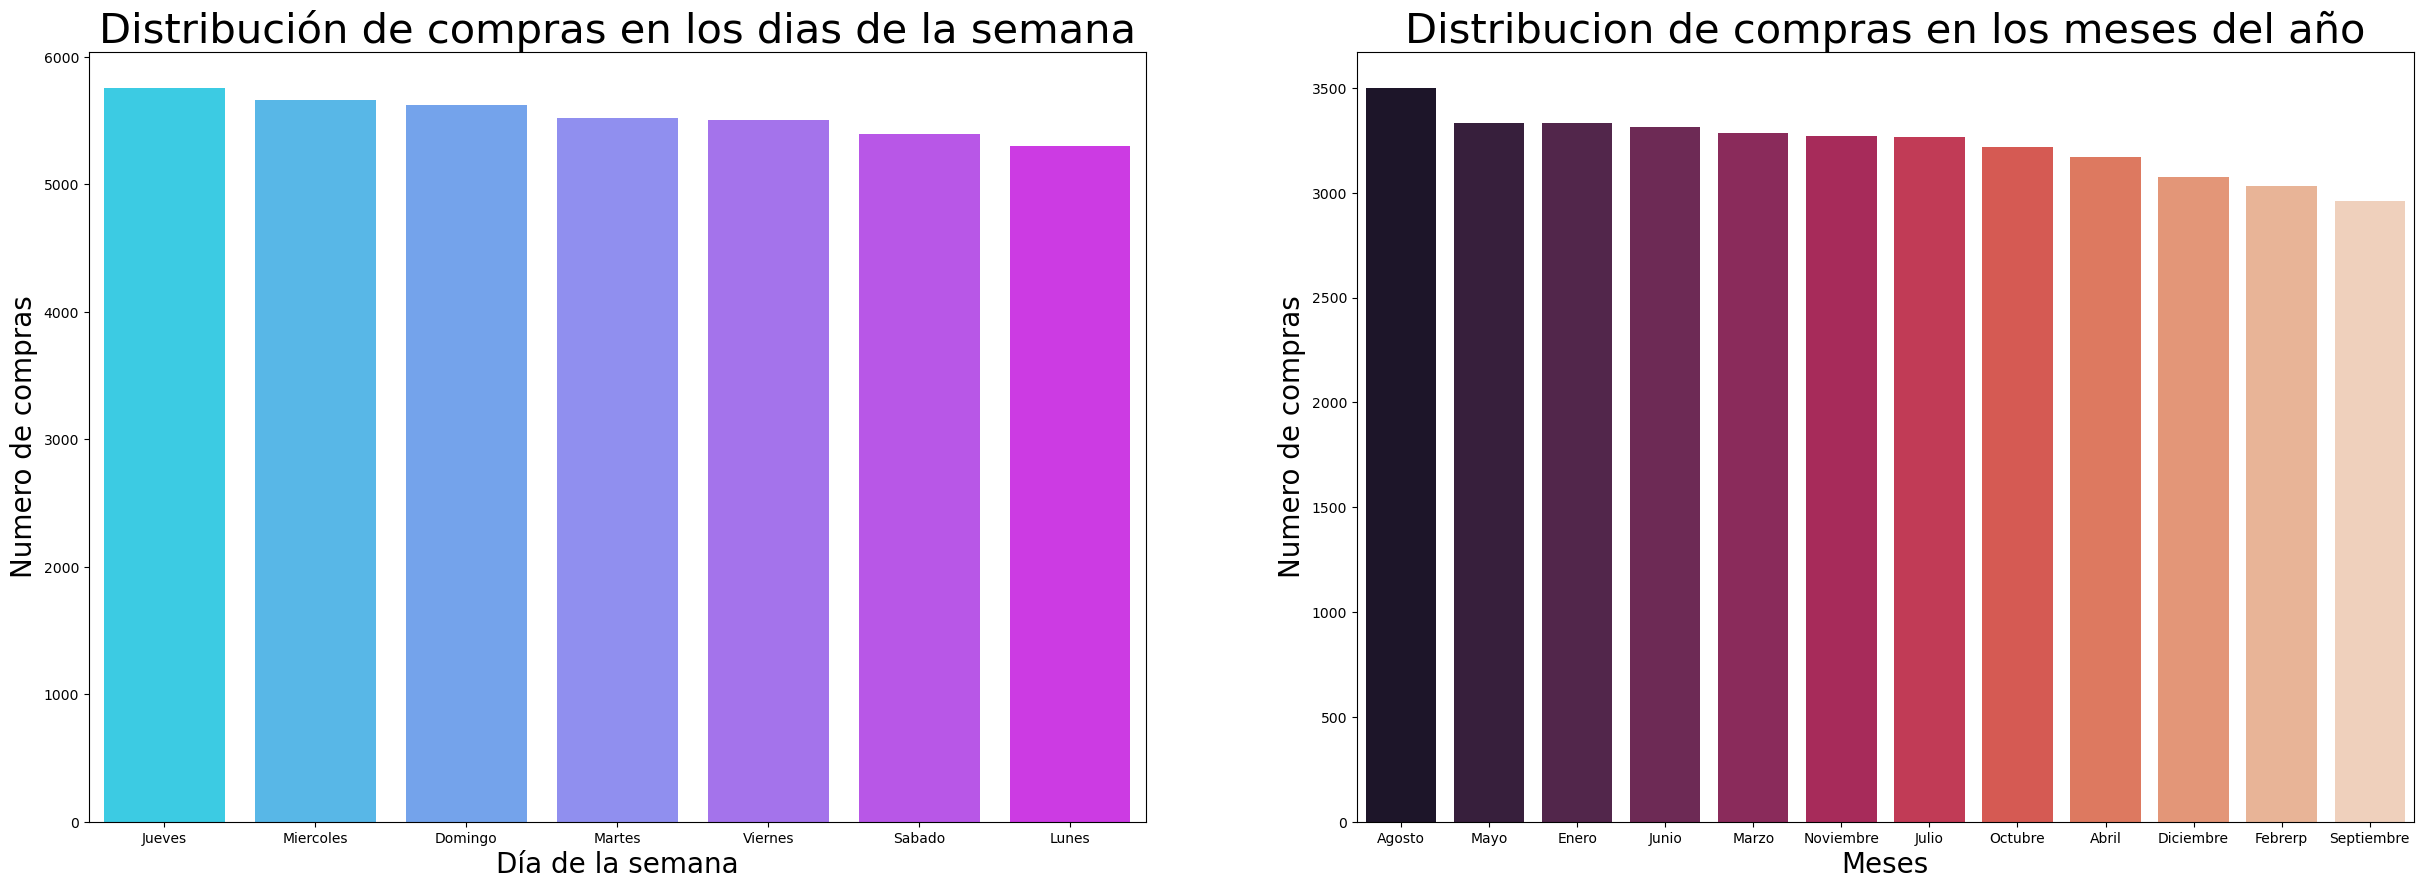

In [72]:
f, ax = plt.subplots(1,2,figsize=(30, 10))

Frame = pd.DataFrame(DaysOfWeek)
Compras = []
for index, day in enumerate(DaysOfWeek):
    Filter = df[df['Day'] == index]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot = sns.barplot(x = Frame[0], y = Frame[1], palette='cool', ax=ax[0])
Plot.set_xlabel('Día de la semana', fontsize=20)
Plot.set_ylabel('Numero de compras', fontsize=20)
Plot.set_title('Distribución de compras en los dias de la semana', fontsize=30)

Frame = pd.DataFrame(MonthsOfYear)
Compras = []
for index, Month in enumerate(MonthsOfYear):
    Filter = df[df['Month'] == index+1]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot2 = sns.barplot(x = Frame[0], y = Frame[1], palette='rocket', ax=ax[1])
Plot2.set_xlabel('Meses', fontsize=20)
Plot2.set_ylabel('Numero de compras', fontsize=20)
Plot2.set_title('Distribucion de compras en los meses del año', fontsize=30);

print()

### Comportamiento de compras en los dos años

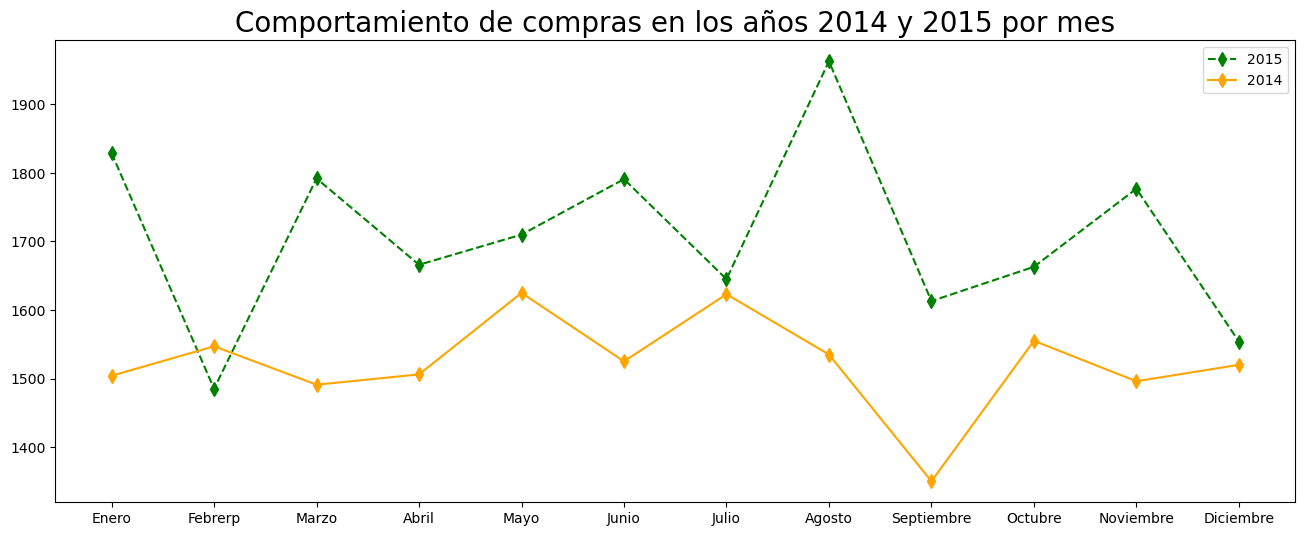

In [76]:
Frame = df[df['Year'] == 2015].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='green', ls='--', marker = 'd', ms=7, label='2015')

Frame = df[df['Year'] == 2014].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='orange', ls='-', marker = 'd', ms=7, label='2014')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(1,13)), MonthsOfYear)
plt.title('Comportamiento de compras en los años 2014 y 2015 por mes', fontsize=20)
plt.show()


### Comportamiento de compras en los dos años en los días de la semana

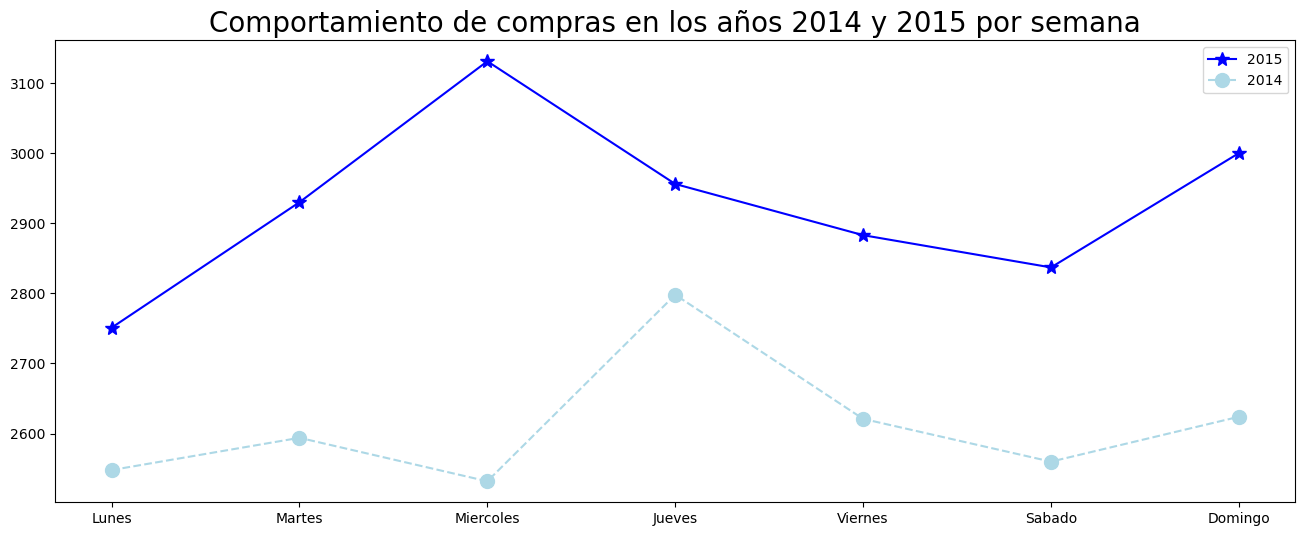

In [77]:
Frame = df[df['Year'] == 2015].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='blue', ls='-', marker = '*', ms=10, label='2015')

Frame = df[df['Year'] == 2014].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='lightblue', ls='--', marker = 'o', ms=10, label='2014')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(0,7)), DaysOfWeek)
plt.title('Comportamiento de compras en los años 2014 y 2015 por semana', fontsize=20)
plt.show()

> <font color='darkcyan'><b><h2>Reflexión I</h2></b></font>
>


<p style='text-align: justify;'>Deduciendo rápidamente, nos damos cuenta que la popularidad de la tienda en cuanto a ventas aumento a lo largo de un año, en 2015 el día más popular o más frecuente por los clientes es el miércoles mientras en 2014 es el jueves. Los días domingo también son días muy populares, esto debido a que la mayoría de las personas descansan los fines de semana y aprovechan el tiempo para ir de compras. No tenemos suficiente información, pero se puede inferir que los días miércoles se colocan más ofertas y eso se ve reflejado en las ventas.</p>


### Productos destacados y aquellos menos populares

C:\Users\DESCOBAR\AppData\Local\Temp\ipykernel_6552\251584774.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


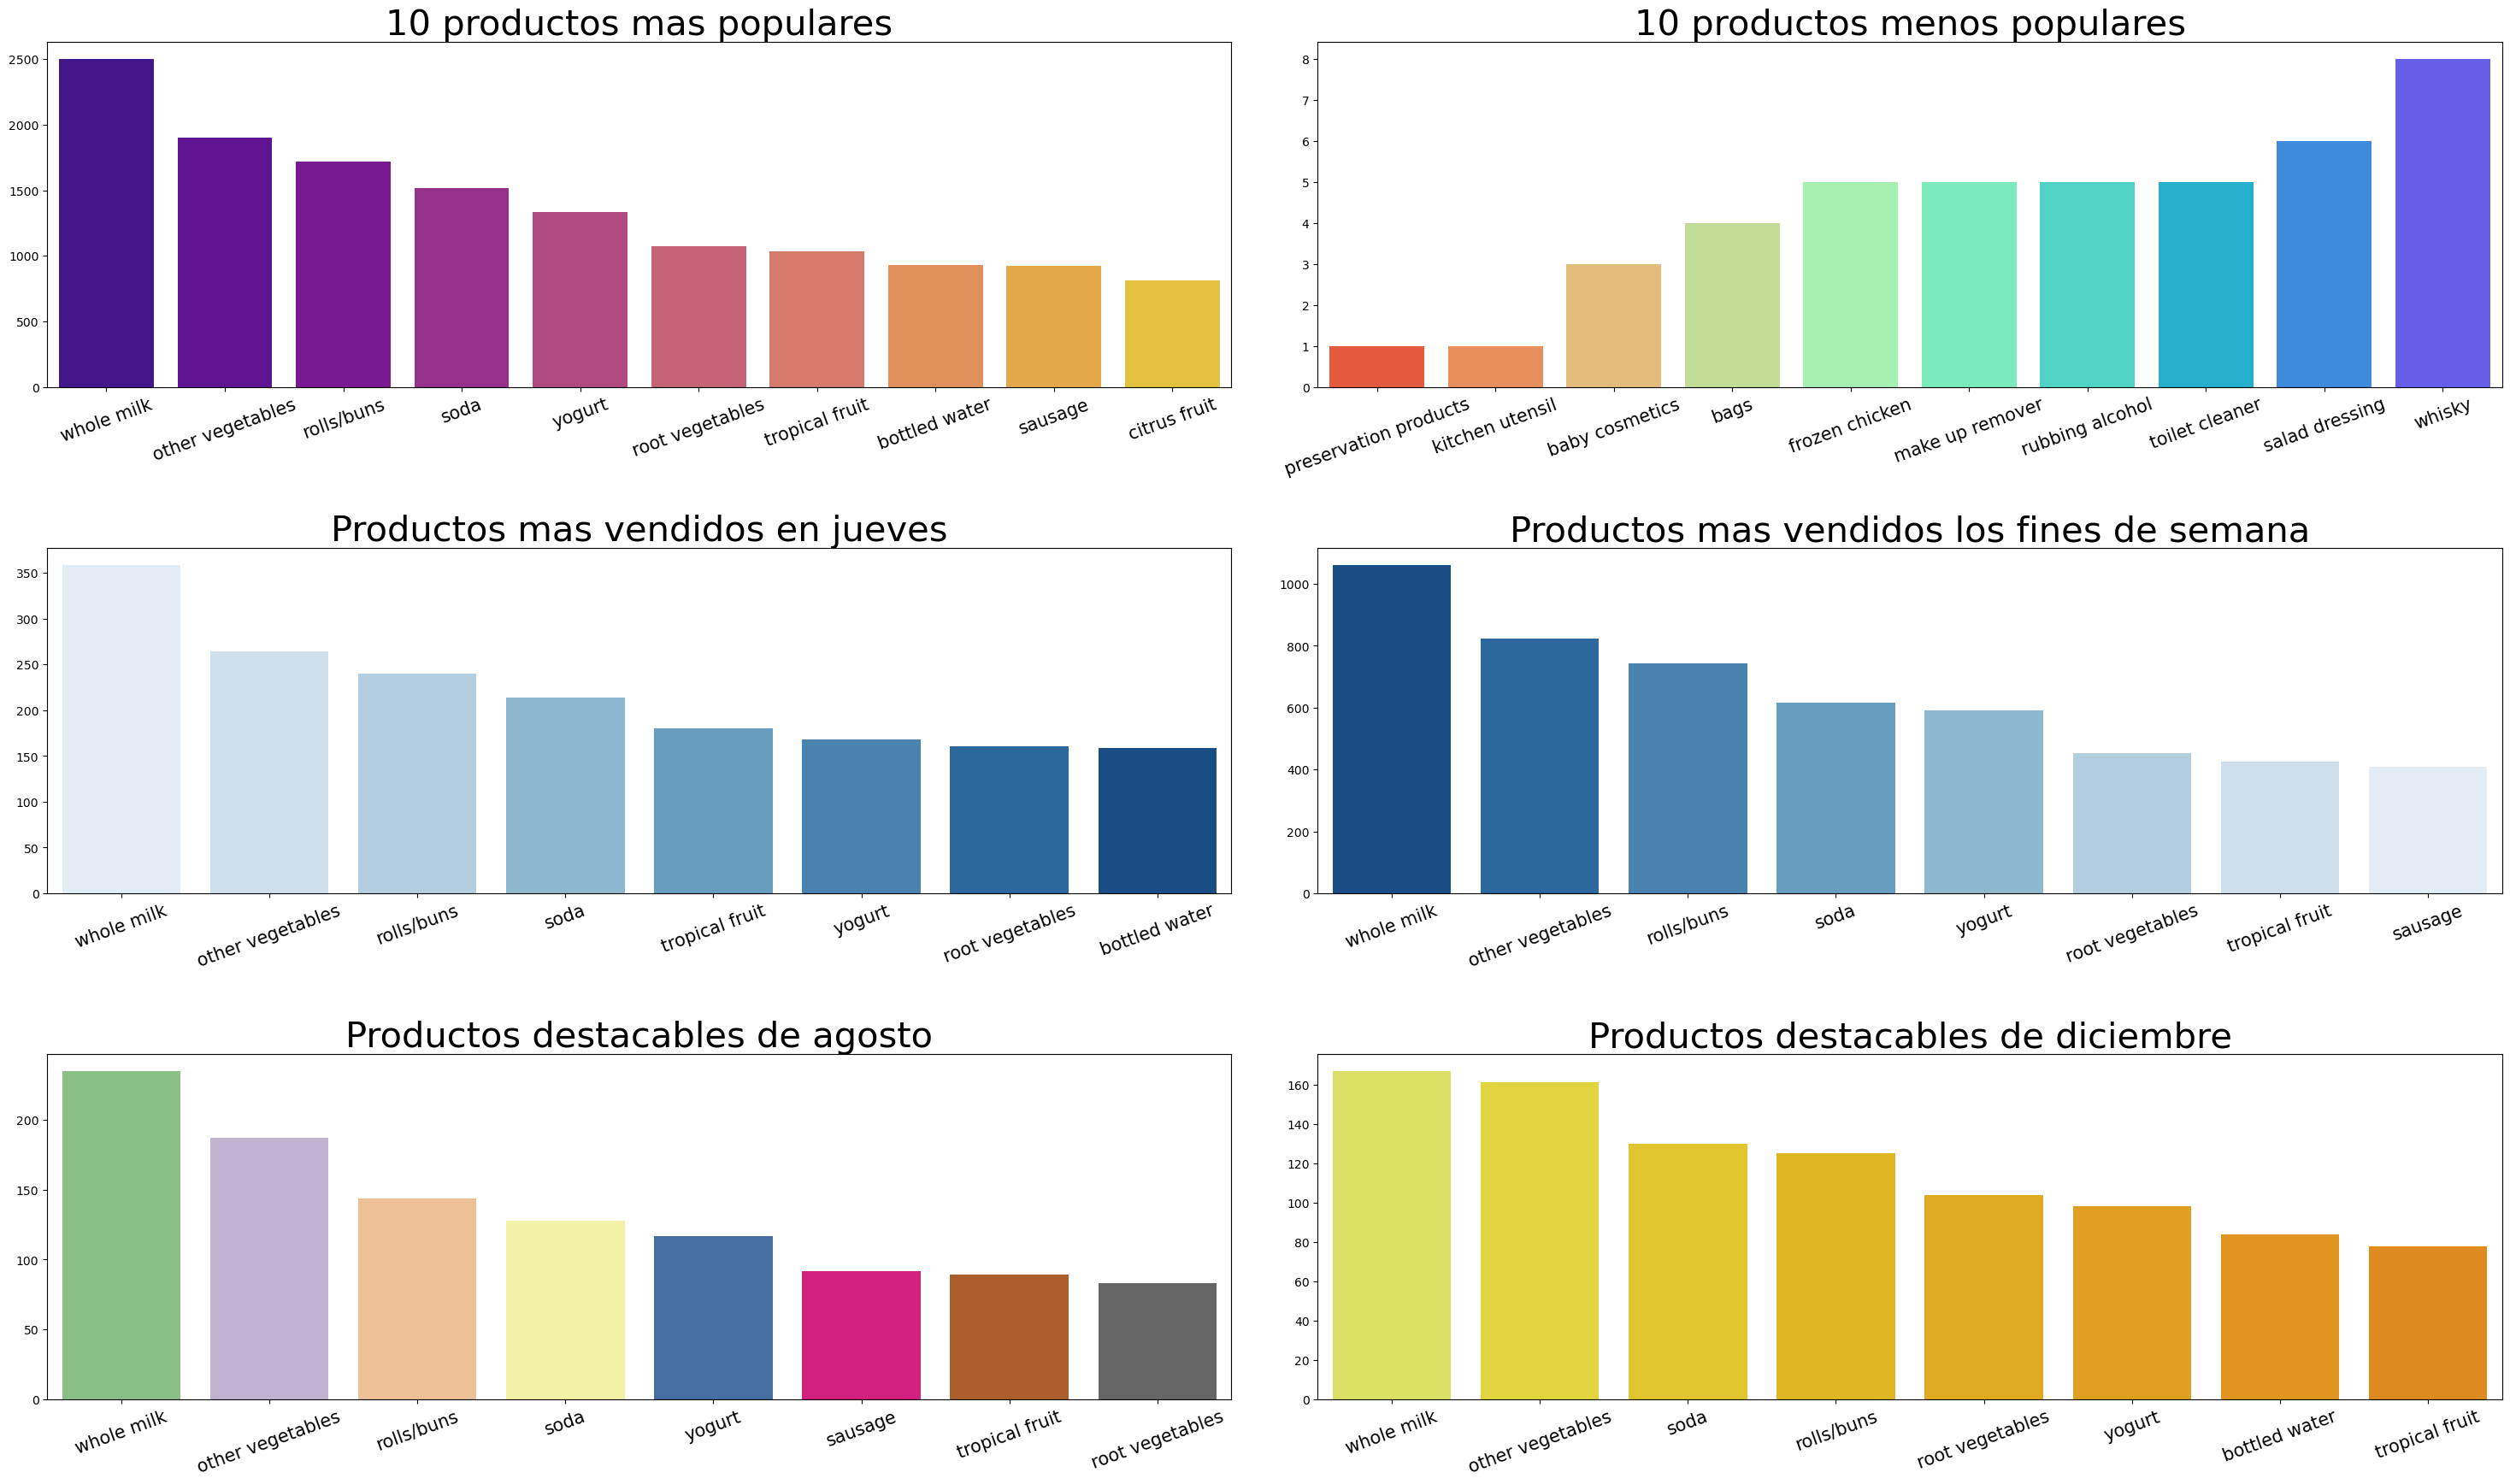

In [83]:
f, ax = plt.subplots(3,2,figsize=(30, 18))

# se define una función para codear menos.
def BarPlot(x, y, ax, title, palette):
    Plot = sns.barplot(x = x, y= y, ax=ax, palette=palette)
    Plot.set_title(title, fontsize=30)
    Plot.set_xticklabels(Plot.get_xticklabels(), rotation=20, fontsize=15)
    

Frame = df['itemDescription'].value_counts().sort_values(ascending = False)[:10]
BarPlot(Frame.index, Frame.values, ax[0,0], '10 productos mas populares', 'plasma')

Frame = df['itemDescription'].value_counts().sort_values(ascending = True)[:10]
BarPlot(Frame.index, Frame.values, ax[0,1], '10 productos menos populares', 'rainbow_r')

Frame = df[(df['Day'] == 3)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,0], 'Productos mas vendidos en jueves', 'Blues')

Frame = df[(df['Day'] == 6) | (df['Day'] == 5) | (df['Day'] == 4)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,1], 'Productos mas vendidos los fines de semana', 'Blues_r')

Frame = df[(df['Month'] == 8)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[2,0], 'Productos destacables de agosto', 'Accent')

Frame = df[(df['Month'] == 12)]
Frame = Frame['itemDescription'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[2,1], 'Productos destacables de diciembre', 'Wistia')

f.tight_layout(pad=3.0)
f.show()

 ### Productos que mas destacan por medio de WordCloud

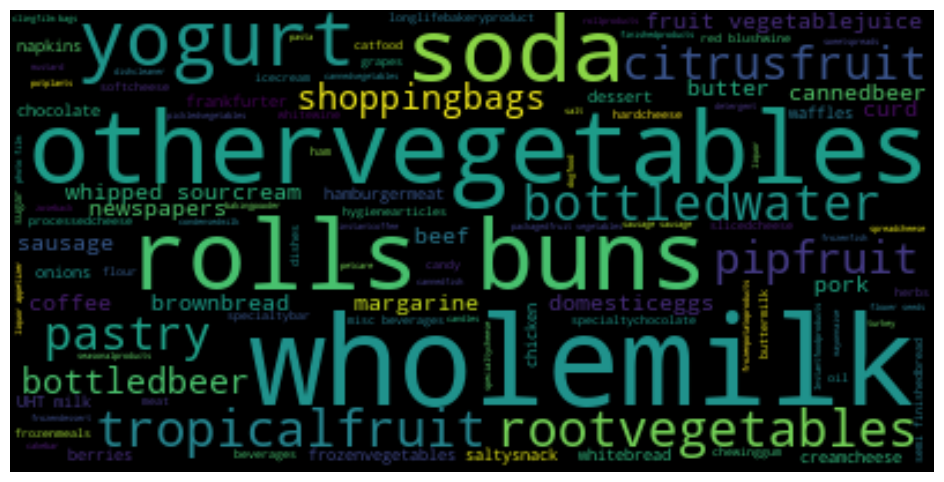

In [84]:
Text = ''
for index, value in enumerate(df['itemDescription']):
    Text += ' ' + value.replace(" ", '')
Wc = WordCloud().generate(Text)

plt.imshow(Wc, interpolation='bilinear')
plt.axis("off")
plt.show()

> <font color='darkcyan'><b><h2>Reflexión II</h2></b></font>
>


<p style='text-align: justify;'>Por mucho, el producto más vendido es leche y vegetables, lo básico en alimentos. Existen productos como utensilios de cocina o productos de preservación. El mercado verdaderamente importante para esta tienda son los productos de canasta básica y frescos: Frutas, vegetales, carnes, leche, entre otros. Lo idea es enfocarse en estos productos e implementar estrategias de venta en estos productos que la clientela busca.</p>


> <font color='darkcyan'><b><h2>Preparación de data para el modelo Apriori</h2></b></font>
>


In [94]:
# se binarizan los items del dataset
OneHot = pd.get_dummies(df['itemDescription'])


AprioriData = pd.DataFrame(df)
AprioriData.drop(['itemDescription'], inplace=True, axis=1)
AprioriData = AprioriData.join(OneHot)

Products = df.itemDescription.unique()
AprioriData = AprioriData.groupby(['Member_number', 'Date'])[Products[:]].sum()
AprioriData = AprioriData.reset_index()
AprioriData.head()

Member_number       Date  tropical fruit  whole milk  pip fruit  \
0           1000 2014-06-24               0           1          0   
1           1000 2015-03-15               0           1          0   
2           1000 2015-05-27               0           0          0   
3           1000 2015-07-24               0           0          0   
4           1000 2015-11-25               0           0          0   

   other vegetables  rolls/buns  pot plants  citrus fruit  beef  frankfurter  \
0                 0           0           0             0     0            0   
1                 0           0           0             0     0            0   
2                 0           0           0             0     0            0   
3                 0           0           0             0     0            0   
4                 0           0           0             0     0            0   

   chicken  butter  fruit/vegetable juice  packaged fruit/vegetables  \
0        0       0                      0                          0   
1        0       0                      0                          0   
2        0       0                      0                          0   
3        0       0                      0                          0   
4        0       0                      0                          0   

   chocolate  specialty bar  butter milk  bottled water  yogurt  sausage  \
0          0              0            0              0       0        0   
1          0              0            0              0       1        1   
2          0              0            0              0       0        0   
3          0              0            0              0       0        0   
4          0              0            0              0       0        1   

   brown bread  hamburger meat  root vegetables  pork  pastry  canned beer  \
0            0               0                0     0       1            0   
1            0               0                0     0       0            0   
2            0               0                0     0       0            0   
3            0               0                0     0       0            1   
4            0               0                0     0       0            0   

   berries  coffee  misc. beverages  ham  turkey  curd cheese  red/blush wine  \
0        0       0                0    0       0            0               0   
1        0       0                0    0       0            0               0   
2        0       0                0    0       0            0               0   
3        0       0                1    0       0            0               0   
4        0       0                0    0       0            0               0   

   frozen potato products  flour  sugar  frozen meals  herbs  soda  detergent  \
0                       0      0      0             0      0     0          0   
1                       0      0      0             0      0     0          0   
2                       0      0      0             0      0     1          0   
3                       0      0      0             0      0     0          0   
4                       0      0      0             0      0     0          0   

   grapes  processed cheese  fish  sparkling wine  newspapers  curd  pasta  \
0       0                 0     0               0           0     0      0   
1       0                 0     0               0           0     0      0   
2       0                 0     0               0           0     0      0   
3       0                 0     0               0           0     0      0   
4       0                 0     0               0           0     0      0   

   popcorn  finished products  beverages  bottled beer  dessert  dog food  \
0        0                  0          0             0        0         0   
1        0                  0          0             0        0         0   
2        0                  0          0             0        0     

In [90]:
AprioriData = AprioriData.drop(['Member_number', 'Date'], axis=1)

In [91]:
AprioriData.head()

tropical fruit  whole milk  pip fruit  other vegetables  rolls/buns  \
0               0           1          0                 0           0   
1               0           1          0                 0           0   
2               0           0          0                 0           0   
3               0           0          0                 0           0   
4               0           0          0                 0           0   

   pot plants  citrus fruit  beef  frankfurter  chicken  butter  \
0           0             0     0            0        0       0   
1           0             0     0            0        0       0   
2           0             0     0            0        0       0   
3           0             0     0            0        0       0   
4           0             0     0            0        0       0   

   fruit/vegetable juice  packaged fruit/vegetables  chocolate  specialty bar  \
0                      0                          0          0              0   
1                      0                          0          0              0   
2                      0                          0          0              0   
3                      0                          0          0              0   
4                      0                          0          0              0   

   butter milk  bottled water  yogurt  sausage  brown bread  hamburger meat  \
0            0              0       0        0            0               0   
1            0              0       1        1            0               0   
2            0              0       0        0            0               0   
3            0              0       0        0            0               0   
4            0              0       0        1            0               0   

   root vegetables  pork  pastry  canned beer  berries  coffee  \
0                0     0       1            0        0       0   
1                0     0       0            0        0       0   
2                0     0       0            0        0       0   
3                0     0       0            1        0       0   
4                0     0       0            0        0       0   

   misc. beverages  ham  turkey  curd cheese  red/blush wine  \
0                0    0       0            0               0   
1                0    0       0            0               0   
2                0    0       0            0               0   
3                1    0       0            0               0   
4                0    0       0            0               0   

   frozen potato products  flour  sugar  frozen meals  herbs  soda  detergent  \
0                       0      0      0             0      0     0          0   
1                       0      0      0             0      0     0          0   
2                       0      0      0             0      0     1          0   
3                       0      0      0             0      0     0          0   
4                       0      0      0             0      0     0          0   

   grapes  processed cheese  fish  sparkling wine  newspapers  curd  pasta  \
0       0                 0     0               0           0     0      0   
1       0                 0     0               0           0     0      0   
2       0                 0     0               0           0     0      0   
3       0                 0     0               0           0     0      0   
4       0                 0     0               0           0     0      0   

   popcorn  finished products  beverages  bottled beer  dessert  dog food  \
0        0                  0          0             0        0         0   
1        0                  0          0             0        0         0   
2        0                  0          0             0        0         0   
3        0                  0          0             0        0         0   
4        0                  0          0             0        0       

In [92]:
def Names(x):
    for Product in Products:
        if x[Product] != 0:
            x[Product] = Product
    return x

AprioriData = AprioriData.apply(Names, axis=1)
AprioriData.head()

tropical fruit  whole milk pip fruit other vegetables rolls/buns pot plants  \
0              0  whole milk         0                0          0          0   
1              0  whole milk         0                0          0          0   
2              0           0         0                0          0          0   
3              0           0         0                0          0          0   
4              0           0         0                0          0          0   

  citrus fruit beef frankfurter chicken butter fruit/vegetable juice  \
0            0    0           0       0      0                     0   
1            0    0           0       0      0                     0   
2            0    0           0       0      0                     0   
3            0    0           0       0      0                     0   
4            0    0           0       0      0                     0   

  packaged fruit/vegetables chocolate specialty bar butter milk bottled water  \
0                         0         0             0           0             0   
1                         0         0             0           0             0   
2                         0         0             0           0             0   
3                         0         0             0           0             0   
4                         0         0             0           0             0   

   yogurt  sausage brown bread hamburger meat root vegetables pork  pastry  \
0       0        0           0              0               0    0  pastry   
1  yogurt  sausage           0              0               0    0       0   
2       0        0           0              0               0    0       0   
3       0        0           0              0               0    0       0   
4       0  sausage           0              0               0    0       0   

   canned beer berries coffee  misc. beverages ham turkey curd cheese  \
0            0       0      0                0   0      0           0   
1            0       0      0                0   0      0           0   
2            0       0      0                0   0      0           0   
3  canned beer       0      0  misc. beverages   0      0           0   
4            0       0      0                0   0      0           0   

  red/blush wine frozen potato products flour sugar frozen meals herbs  soda  \
0              0                      0     0     0            0     0     0   
1              0                      0     0     0            0     0     0   
2              0                      0     0     0            0     0  soda   
3              0                      0     0     0            0     0     0   
4              0                      0     0     0            0     0     0   

  detergent grapes processed cheese fish sparkling wine newspapers curd pasta  \
0         0      0                0    0              0          0    0     0   
1         0      0                0    0              0          0    0     0   
2         0      0                0    0              0          0    0     0   
3         0      0                0    0              0          0    0     0   
4         0      0                0    0              0          0    0     0   

  popcorn finished products beverages bottled beer dessert dog food  \
0       0                 0         0            0       0        0   
1       0                 0         0            0       0        0   
2       0                 0         0            0       0        0   
3       0                 0         0            0       0        0   
4       0                 0         0            0       0        0   

  specialty chocolate condensed milk cleaner white wine meat ice cream  \
0                   0              0       0          0    0         0   
1                   0              0       0          0    0         0   
2                   0              0       0          0    0         0

In [93]:
AprioriArray = AprioriData.values
Transactions = []

for i in range(AprioriArray.shape[0]):
    x = []
    for j in range(AprioriArray.shape[1]):
        if AprioriArray[i,j] != 0:
            x.append(AprioriArray[i,j])
    Transactions.append(x)

Transactions[0:10]

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

> <font color='darkcyan'><b><h2>Despliegue Modelo Apriori</h2></b></font>
>


In [95]:
Rules = apriori(
    transactions = Transactions,
    min_support = 0.0003,
    min_confidence = 0.05,
    min_lift = 3,
    min_length = 2,
)

AssociationRules = list(Rules)

for item in AssociationRules:

    par = item[0] 
    items = [x for x in par]
    print("Regla:       " + items[0] + " -> " + items[1])
    print("Soporte:     " + str(item[1]))
    print("Confianza:   " + str(item[2][0][2]))
    print("Mejora lift: " + str(item[2][0][3]))
    print("***************************************************")

Regla:       liver loaf -> fruit/vegetable juice
Soporte:     0.00040098910646260775
Confianza:   0.12
Mejora lift: 3.5276227897838903
***************************************************
Regla:       pickled vegetables -> ham
Soporte:     0.0005346521419501437
Confianza:   0.05970149253731344
Mejora lift: 3.4895055970149254
***************************************************
Regla:       roll products  -> meat
Soporte:     0.0003341575887188398
Confianza:   0.06097560975609757
Mejora lift: 3.620547812620984
***************************************************
Regla:       salt -> misc. beverages
Soporte:     0.0003341575887188398
Confianza:   0.05617977528089888
Mejora lift: 3.5619405827461437
***************************************************
Regla:       spread cheese -> misc. beverages
Soporte:     0.0003341575887188398
Confianza:   0.05
Mejora lift: 3.170127118644068
***************************************************
Regla:       soups -> seasonal products
Soporte:     0.000334157

> <font color='darkcyan'><b><h2>Conclusión</h2></b></font>
>


<p style='text-align: justify;'>El algoritmo nos arroja estas reglas, realmente no existe una destacable debido a los bajos valores de soporte. Efectivamente hay días en que la compra es altisima, pero la soporte entre ellas es bastante bajo.</p>


<p style='text-align: justify;'>Por ejemplo, el soporte de <b>butter milk -> yogurt</b> es de <b>0.0003341575887188398</b> lo cual, desde mi mirada, cuado compro mantequilla generalmente compro yogurt, claro es mi caso particular.</p>

---
<div>
    <img src='https://upload.wikimedia.org/wikipedia/commons/6/6f/Logo-udla.jpg' with='50' height='15'align=center> 
</div>

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---

<h2><font color='darkcyan'>Examen Machine Learning I</font></h2>
<h3><font color='IndianRed'>Problema 3: Detección de anomalías</font></h3>

<p1><b><h3>Nombre: Didimo Escobar</h3></b></p1>

<p1><b>GitHub: https://github.com/descobardos/MG-Data-Science/tree/main/Machine%20Learning%20I</b></p1>

<p2><b>Email: descobardos@gmail.com</b></p2>
<br></br>

> El objetivo y espiritu de este proceso es evaluar los contenidos aprendidos durante este bimestre en Machine Learning I, que aborda el aprendizaje no supervisado.
>


#### Problema 3: Detección de anomalías

<p style='text-align: justify;'>Basado en un dataset que contiene mediciones del consumo de energía eléctrica en un hogar con una tasa de muestreo de un minuto durante un período de casi 4 años. Están disponibles diferentes magnitudes eléctricas y algunos valores de submedición.</p>

Dataset: https://patricioaraneda.cl/public_data/household_power_consumption.txt

<p>Información de atributos:</p>
<ol>
<li><b>dt:</b> Fecha en formato dd/mm/aaaa hh:mm:ss</li>
<li><b>Global_active_power:</b> potencia activa global promediada por minuto del hogar (en kilovatios)</li>
<li><b>Global_reactive_power:</b> potencia reactiva global media por minuto del hogar (en kilovatios)</li>
<li><b>voltage:</b> voltaje medio por minuto (en voltios)</li>
<li><b>Global_intensity:</b> intensidad de corriente promediada por minutos global del hogar (en amperios)</li>
<li><b>Sub_metering_1:</b> submedición de energía nº 1 (en vatios-hora de energía activa). Corresponde a la cocina, que contiene principalmente un lavavajillas, un horno y un microondas (las placas no son eléctricas sino de gas).</li>
<li><b>Sub_metering_2:</b> submedición de energía nº 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene una lavadora, una secadora, un frigorífico y una luz.</li>
<li><b>Sub_metering_3:</b> submedición de energía nº 3 (en vatios-hora de energía activa). Corresponde a un calentador de agua eléctrico y a un aire acondicionado.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# settings para pandas
pd.set_option('display.max_columns', 500)

# settings para 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# se define como objeto el archivo desde url no GitHub
url = 'https://www.patricioaraneda.cl/public_data/household_power_consumption.txt'

In [3]:
power = pd.read_csv(url, encoding='utf-8', sep=';', low_memory=False)

### Carga de datos en un objeto llamado 'df'

In [4]:
df = power.copy()

In [5]:
#primeros cinco registros
df.head(n=5)

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [6]:
#ultimos cinco registros
df.tail(n=5)

Date      Time Global_active_power Global_reactive_power  \
2075254  26/11/2010  20:58:00               0.946                 0.000   
2075255  26/11/2010  20:59:00               0.944                 0.000   
2075256  26/11/2010  21:00:00               0.938                 0.000   
2075257  26/11/2010  21:01:00               0.934                 0.000   
2075258  26/11/2010  21:02:00               0.932                 0.000   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
2075254  240.430            4.000          0.000          0.000   
2075255  240.000            4.000          0.000          0.000   
2075256  239.820            3.800          0.000          0.000   
2075257  239.700            3.800          0.000          0.000   
2075258  239.550            3.800          0.000          0.000   

         Sub_metering_3  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0

### ¿Cuantos registros tiene el dataset?

In [7]:
df.shape

(2075259, 9)

In [8]:
# se identifica la forma del dataset
print(f'La cantidad de columnas del dataset es de: \033[94m {df.shape[1]} \033[0m')

La cantidad de columnas del dataset es de:  9 


In [9]:
# se identifica la forma del dataset
print(f'La cantidad de filas del dataset es de: \033[94m {df.shape[0]} \033[0m')

La cantidad de filas del dataset es de:  2075259 


In [10]:
print(f'La cantidad de valores NaN es de: \033[94m{df.isnull().sum().sum()}\033[0m en todo el dataset')

La cantidad de valores NaN es de: 25979 en todo el dataset


In [11]:
# solamente datos unicos
df.nunique()

Date                     1442
Time                     1440
Global_active_power      4187
Global_reactive_power     533
Voltage                  2838
Global_intensity          222
Sub_metering_1             89
Sub_metering_2             82
Sub_metering_3             32
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Verificación de valores NaN como de caracteres especiales

In [13]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [14]:
# el dataframe posee NaN en su proceso, solo una variable posee un 1.25% de datos faltantes
(df.isna().sum()/len(df))*100

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

#### Existe un 1.25% de datos faltantes en la variable Sub_merering_3

In [15]:
# se observa cantidad de atrubutos con este caracter y coinciden con valores NaN de Sub_metering_3
df[df['Voltage'] == '?']

Date      Time Global_active_power Global_reactive_power  \
6839     21/12/2006  11:23:00                   ?                     ?   
6840     21/12/2006  11:24:00                   ?                     ?   
19724    30/12/2006  10:08:00                   ?                     ?   
19725    30/12/2006  10:09:00                   ?                     ?   
41832     14/1/2007  18:36:00                   ?                     ?   
...             ...       ...                 ...                   ...   
1990185   28/9/2010  19:09:00                   ?                     ?   
1990186   28/9/2010  19:10:00                   ?                     ?   
1990187   28/9/2010  19:11:00                   ?                     ?   
1990188   28/9/2010  19:12:00                   ?                     ?   
2027411  24/10/2010  15:35:00                   ?                     ?   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839          ?                ?              ?              ?             NaN  
6840          ?                ?              ?              ?             NaN  
19724         ?                ?              ?              ?             NaN  
19725         ?                ?              ?              ?             NaN  
41832         ?                ?              ?              ?             NaN  
...         ...              ...            ...            ...             ...  
1990185       ?                ?              ?              ?             NaN  
1990186       ?                ?              ?              ?             NaN  
1990187       ?                ?              ?              ?             NaN  
1990188       ?                ?              ?              ?             NaN  
2027411       ?                ?              ?              ?             NaN  

[25979 rows x 9 columns]

In [16]:
# se eliminan caracter especial '?'
df.drop(df[(df['Global_active_power'] == '?') &
           (df['Global_reactive_power'] == '?') &
           (df['Voltage'] == '?') &
           (df['Global_intensity'] == '?') &
           (df['Sub_metering_1'] == '?') &
           (df['Sub_metering_2'] == '?')].index, inplace=True)

In [17]:
# se genera una verificación
df[df['Voltage'] == '?']

Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []

In [18]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Transformacion de variables

In [19]:
# variables tipo tiempo
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# variables numericas
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
df['Voltage'] = pd.to_numeric(df['Voltage'])
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'])


### ¿Cuál es el tipo de la variable 'Voltage'

In [20]:
# contexto del dataset y tipo de variable
print(f'La variable voltage es de tipo: \033[94m{df["Voltage"].dtype}\033[0m')

La variable voltage es de tipo: float64


### ¿Cuáles son los valores mínimo y máximo de la variable 'Voltage'?

In [21]:
df['Voltage'].min()

223.2

In [22]:
df['Voltage'].max()

254.15

### ¿Existe alguna variable con más del 30% de valores faltantes?

> No, solo la variable Sub_metering_3 poseia un 1.25% de datos faltantes, que en paralelo se daba en las variables a las cuales les fue eliminado el caracter especial '?'

### ¿Cuál es la cantidad de variables categóricas en el dataset? y numéricas?

> Post transformación no hay variables residentes de tipo categorica.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 156.3 MB


### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

> El dataset de origen desde la url  https://patricioaraneda.cl/public_data/household_power_consumption.txt posee valores faltantes en la variable Sub_metering_3, los cuales son 25979 que representan el 1.251% de tamaño total del dataset.

### Si existieran datos faltantes, se prescindirá de ellos.

> Desde el anális de estos datos, ocurrió un feedback interesante. Los datos faltante o NaN fueron coincidentes con el caracter especial '?' que se presentó con las otras variables. Coincidencia o no, me permitió tomar la desición de prescindir de ellos.

> <font color='darkcyan'><b><h2>Correlación de Pearson de las variables</h2></b></font>
>


In [24]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.268172  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

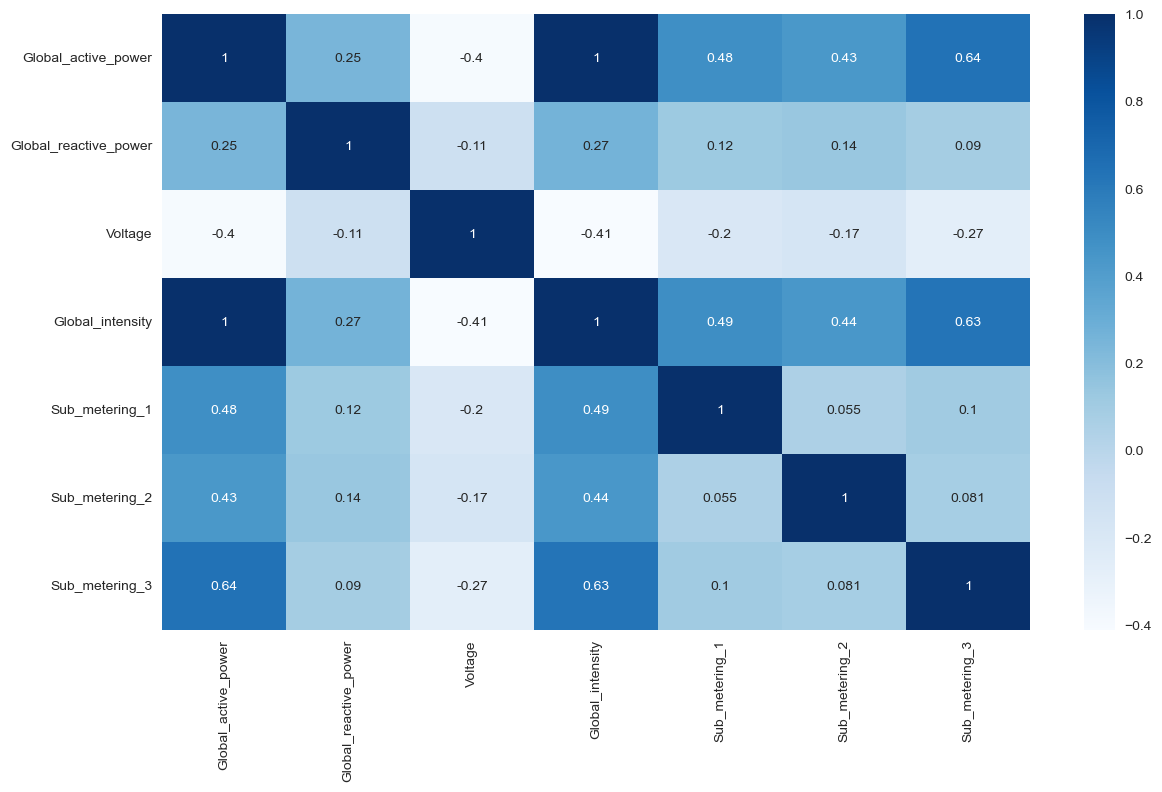

In [25]:
plt.figure(figsize=(14,8))

sns.heatmap(pearsoncorr, annot=True, cmap='Blues');

### ¿Algún gráfico al menos preliminar para mostrar los datos de mayor interés?

> Es factible una gráfica de variables numericas para analizar su distribución y comportamiento

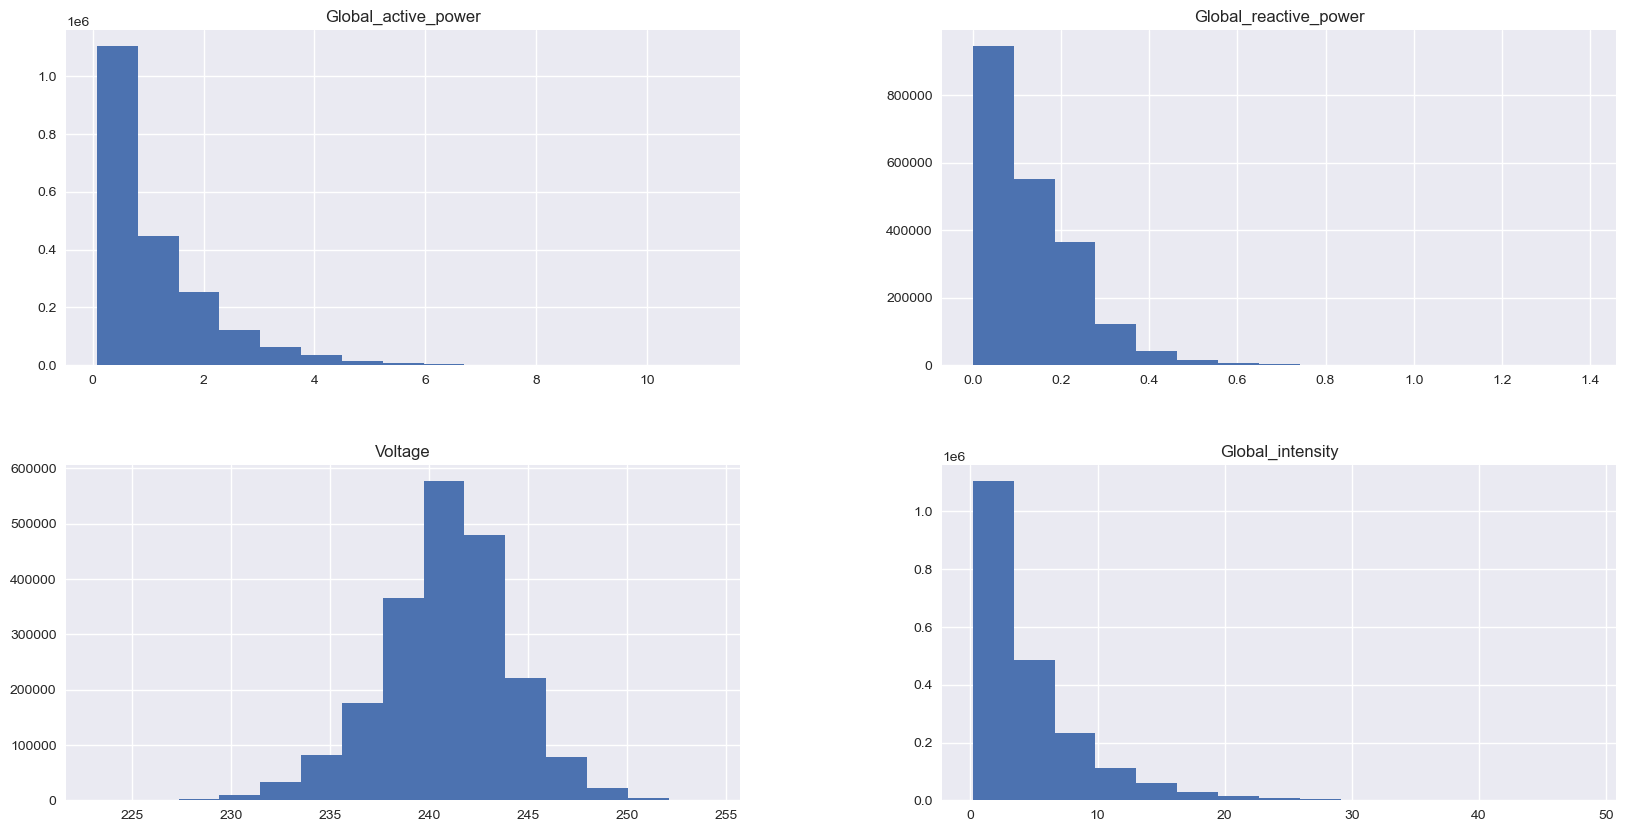

In [26]:
numerical_var = ['Global_active_power', 'Global_reactive_power',
             'Voltage', 'Global_intensity']


df[numerical_var].hist(bins=15, figsize=(20, 10), layout=(2, 2));

> <font color='darkcyan'><b><h2>Isolation Forest</h2></b></font>
>


<p>Basado en el algoritmo del Bosque de aislamiento (Isolation forest) realice los procedimientos necesarios para detectar si hay o no valores anómalos en el dataset.</p>
<ol>
<li>Reserve un 5% de los datos iniciales para pruebas del modelo con datos no vistos.</li>
<li>Utilice del restante el 80% para entrenamiento y el 20% para test</li>
<li>Defina y ajuste el modelo.</li>
<li>Evalue el modelo.</li>
<li>Determine la cantidad de anomalías.</li>
<li>Efectúe una predicción sobre el 5% de datos reservados del inicio.</li>
</ol>

In [27]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [96]:
df_iso = df.copy()

In [97]:
from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

In [98]:
anomaly_inputs = ['Global_active_power',
                  'Global_reactive_power',
                  'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2',
                  'Sub_metering_3']

In [99]:
model_IF = IsolationForest(contamination=float(0.1), random_state=42)

model_IF.fit(df_iso[anomaly_inputs])

df_iso['anomaly_scores'] = model_IF.decision_function(df_iso[anomaly_inputs])

df_iso['anomaly'] = model_IF.predict(df_iso[anomaly_inputs])


D:\04_Miniconda_Install\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
D:\04_Miniconda_Install\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [100]:
df_iso.loc[:, ['Global_active_power',
               'Global_reactive_power','Voltage',
               'Global_intensity','anomaly_scores',
               'anomaly',
               'Sub_metering_1',
               'Sub_metering_2',
               'Sub_metering_3']]

Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  anomaly_scores  anomaly  Sub_metering_1  \
0                    18.4       -0.098692       -1             0.0   
1                    23.0       -0.147544       -1             0.0   
2                    23.0       -0.159699       -1             0.0   
3                    23.0       -0.158489       -1             0.0   
4                    15.8       -0.079763       -1             0.0   
...                   ...             ...      ...             ...   
2075254               4.0        0.100143        1             0.0   
2075255               4.0        0.100682        1             0.0   
2075256               3.8        0.100664        1             0.0   
2075257               3.8        0.103261        1             0.0   
2075258               3.8        0.102780        1             0.0   

         Sub_metering_2  Sub_metering_3  
0                   1.0            17.0  
1                   1.0            16.0  
2                   2.0            17.0  
3                   1.0            17.0  
4                   1.0            17.0  
...                 ...             ...  
2075254             0.0             0.0  
2075255             0.0             0.0  
2075256             0.0             0.0  
2075257             0.0             0.0  
2075258             0.0             0.0  

[2049280 rows x 9 columns]

- Global_active_power

In [101]:
print(df_iso['Global_active_power'].min())
print(df_iso['Global_active_power'].max())

0.076
11.122


- Global_reactive_power

In [102]:
print(df_iso['Global_reactive_power'].min())
print(df_iso['Global_reactive_power'].max())

0.0
1.39


- Voltage

In [103]:
print(df_iso['Voltage'].min())
print(df_iso['Voltage'].max())

223.2
254.15


Global_intensity

In [104]:
print(df_iso['Global_intensity'].min())
print(df_iso['Global_intensity'].max())

0.2
48.4


Sub_metering_1

In [105]:
print(df_iso['Sub_metering_1'].min())
print(df_iso['Sub_metering_1'].max())

0.0
88.0


Sub_metering_2

In [106]:
print(df_iso['Sub_metering_2'].min())
print(df_iso['Sub_metering_2'].max())

0.0
80.0


Sub_metering_3

In [107]:
print(df_iso['Sub_metering_3'].min())
print(df_iso['Sub_metering_3'].max())

0.0
31.0


In [108]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


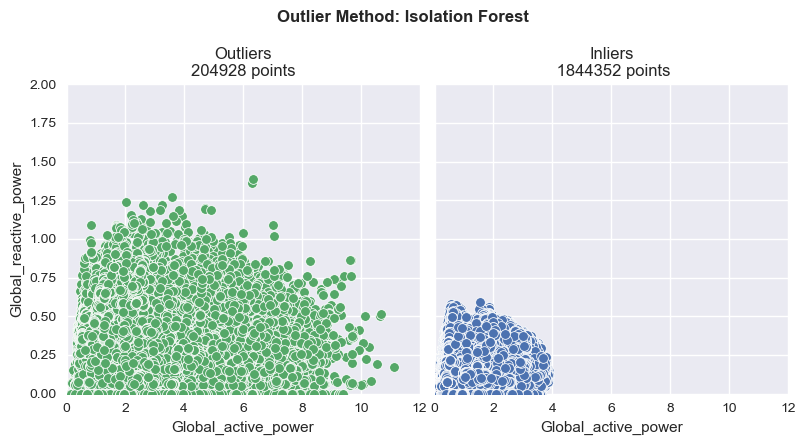

In [109]:
outlier_plot(df_iso, 'Isolation Forest', 'Global_active_power', 'Global_reactive_power', [0, 12], [0, 2]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


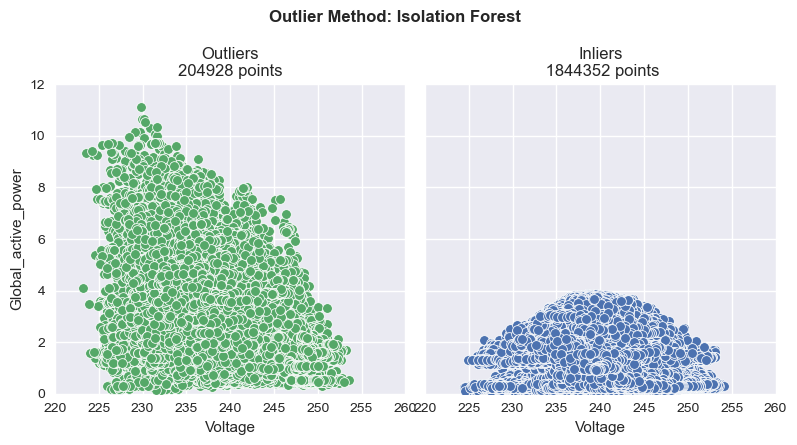

In [110]:
outlier_plot(df_iso, 'Isolation Forest', 'Voltage', 'Global_active_power', [220, 260], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


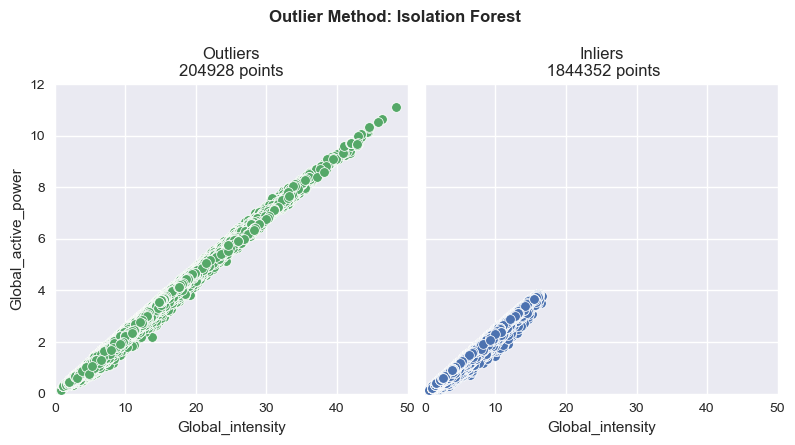

In [111]:
outlier_plot(df_iso, 'Isolation Forest', 'Global_intensity', 'Global_active_power', [0, 50], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


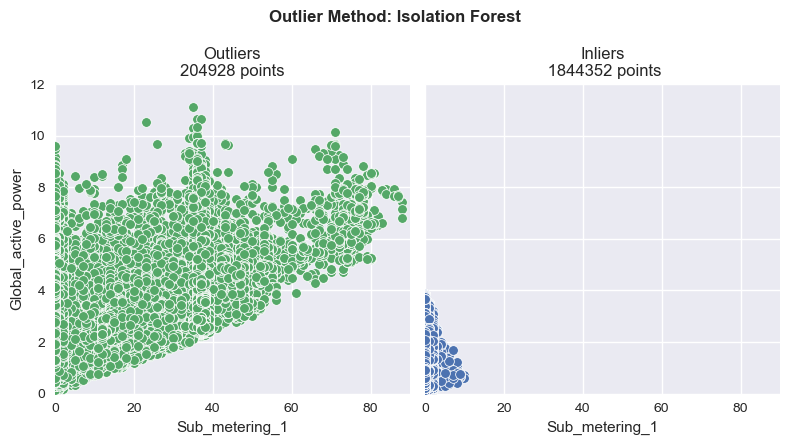

In [112]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_1', 'Global_active_power', [0, 90], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


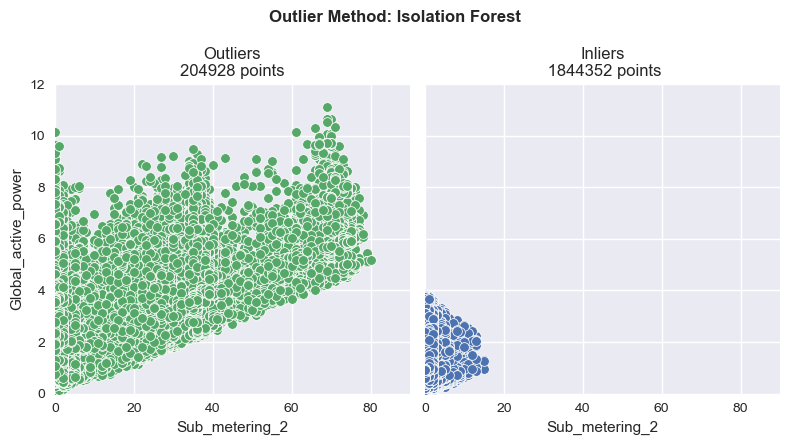

In [113]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_2', 'Global_active_power', [0, 90], [0, 12]);

Outlier Method: Isolation Forest
Number of anomalous values 204928
Number of non anomalous values  1844352
Total Number of Values: 2049280


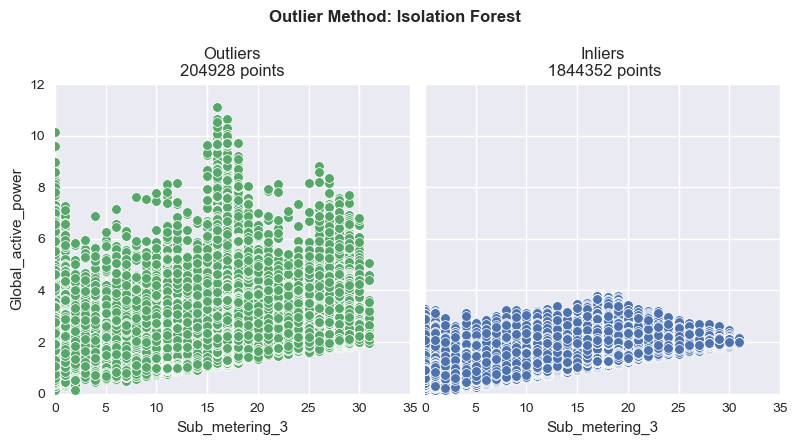

In [114]:
outlier_plot(df_iso, 'Isolation Forest', 'Sub_metering_3', 'Global_active_power', [0, 35], [0, 12]);

In [ ]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_iso, vars=anomaly_inputs, hue='anomaly', palette=palette)

---
<center><h1>Facultad de Ingeniería y Negocios</h1></center>
<center><h1>Magíster en Data Science</h1></center>
<center><h3>Profesor Sr. Jorge Castillo</h3></center>
<center><h3>Profesor Sr. Patricio Araneda</h3></center>

---